# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Trying-to-use-Black-Box-Bayesian-optimization-algorithms-for-a-Gaussian-bandit-problem" data-toc-modified-id="Trying-to-use-Black-Box-Bayesian-optimization-algorithms-for-a-Gaussian-bandit-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trying to use Black-Box Bayesian optimization algorithms for a Gaussian bandit problem</a></div><div class="lev2 toc-item"><a href="#Creating-the-Gaussian-bandit-problem" data-toc-modified-id="Creating-the-Gaussian-bandit-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the Gaussian bandit problem</a></div><div class="lev2 toc-item"><a href="#Using-a-Black-Box-optimization-algorithm" data-toc-modified-id="Using-a-Black-Box-optimization-algorithm-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using a Black-Box optimization algorithm</a></div><div class="lev3 toc-item"><a href="#Implementation" data-toc-modified-id="Implementation-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Implementation</a></div><div class="lev2 toc-item"><a href="#Comparing-its-performance-on-this-Gaussian-problem" data-toc-modified-id="Comparing-its-performance-on-this-Gaussian-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Comparing its performance on this Gaussian problem</a></div><div class="lev3 toc-item"><a href="#Configuring-an-experiment" data-toc-modified-id="Configuring-an-experiment-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Configuring an experiment</a></div><div class="lev3 toc-item"><a href="#Running-an-experiment" data-toc-modified-id="Running-an-experiment-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Running an experiment</a></div><div class="lev3 toc-item"><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Visualizing the results</a></div><div class="lev2 toc-item"><a href="#Another-experiment,-with-just-more-Gaussian-arms" data-toc-modified-id="Another-experiment,-with-just-more-Gaussian-arms-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Another experiment, with just more Gaussian arms</a></div><div class="lev3 toc-item"><a href="#Running-the-experiment" data-toc-modified-id="Running-the-experiment-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Running the experiment</a></div><div class="lev3 toc-item"><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Visualizing the results</a></div><div class="lev3 toc-item"><a href="#Very-good-performance!" data-toc-modified-id="Very-good-performance!-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Very good performance!</a></div><div class="lev2 toc-item"><a href="#Another-experiment,-with-Bernoulli-arms" data-toc-modified-id="Another-experiment,-with-Bernoulli-arms-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Another experiment, with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Running-the-experiment" data-toc-modified-id="Running-the-experiment-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Running the experiment</a></div><div class="lev3 toc-item"><a href="#Visualizing-the-results" data-toc-modified-id="Visualizing-the-results-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Visualizing the results</a></div><div class="lev3 toc-item"><a href="#Very-good-performances-also!" data-toc-modified-id="Very-good-performances-also!-153"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Very good performances also!</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev3 toc-item"><a href="#Non-logarithmic-regret-?" data-toc-modified-id="Non-logarithmic-regret-?-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Non-logarithmic regret ?</a></div><div class="lev3 toc-item"><a href="#Comparing-time-complexity" data-toc-modified-id="Comparing-time-complexity-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Comparing <em>time complexity</em></a></div>

----
# Trying to use Black-Box Bayesian optimization algorithms for a Gaussian bandit problem

This small [Jupyter notebook](https://www.jupyter.org/) presents an experiment, in the context of [Multi-Armed Bandit problems](https://en.wikipedia.org/wiki/Multi-armed_bandit) (MAB).

[I am](http://perso.crans.org/besson/) trying to answer a simple question:

> "Can we use generic black-box Bayesian optimization algorithm, like a [Gaussian process](https://scikit-optimize.github.io/#skopt.gp_minimize) or [Bayesian random forest](https://scikit-optimize.github.io/#skopt.forest_minimize), instead of MAB algorithms like [UCB](http://sbubeck.com/SurveyBCB12.pdf) or [Thompson Sampling](https://en.wikipedia.org/wiki/Thompson_sampling) ?

I will use my [SMPyBandits](https://smpybandits.github.io/) library, for which a complete documentation is available, [here at https://smpybandits.github.io/](https://smpybandits.github.io/), and the [scikit-optimize package (skopt)](https://scikit-optimize.github.io/).

## Creating the Gaussian bandit problem
First, be sure to be in the main folder, and import the [`MAB` class](https://smpybandits.github.io/docs/Environment.MAB.html#Environment.MAB.MAB) from [the `Environment` package](https://smpybandits.github.io/docs/Environment.html#module-Environment):

In [1]:
import numpy as np

In [2]:
from sys import path
path.insert(0, '..')

In [3]:
from Environment import MAB

 - Setting dpi of all figures to 110 ...
 - Setting 'figsize' of all figures to (19.8, 10.8) ...
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


And also, import the [`Gaussian` class](https://smpybandits.github.io/docs/Arms.Gaussian.html#Arms.Gaussian.Gaussian) to create Gaussian-distributed arms.

In [4]:
from Arms import Gaussian

Info: numba.jit seems to be available.


In [5]:
# Just improving the ?? in Jupyter. Thanks to https://nbviewer.jupyter.org/gist/minrk/7715212
from __future__ import print_function
from IPython.core import page
def myprint(s):
    try:
        print(s['text/plain'])
    except (KeyError, TypeError):
        print(s)
page.page = myprint

In [6]:
Gaussian?

Init signature: Gaussian(mu, sigma=0.05, mini=0, maxi=1)
Docstring:     
Gaussian distributed arm, possibly truncated.

- Default is to truncate into [0, 1] (so Gaussian.draw() is in [0, 1]).
Init docstring: New arm.
File:           ~/ownCloud/cloud.openmailbox.org/Thèse_2016-17/src/SMPyBandits.git/Arms/Gaussian.py
Type:           type



Let create a simple bandit problem, with 3 arms, and visualize an histogram showing the repartition of rewards.

In [7]:
means = [0.45, 0.5, 0.55]
M = MAB(Gaussian(mu, sigma=0.2) for mu in means)

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = <generator object <genexpr> at 0x7efdb3a6a3b8> ...
 - with 'arms' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)]
 - with 'means' = [ 0.45  0.5   0.55]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.55
 - with 'minArm' = 0.45

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...
 - with 'arms' represented as: $[G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)^*]$


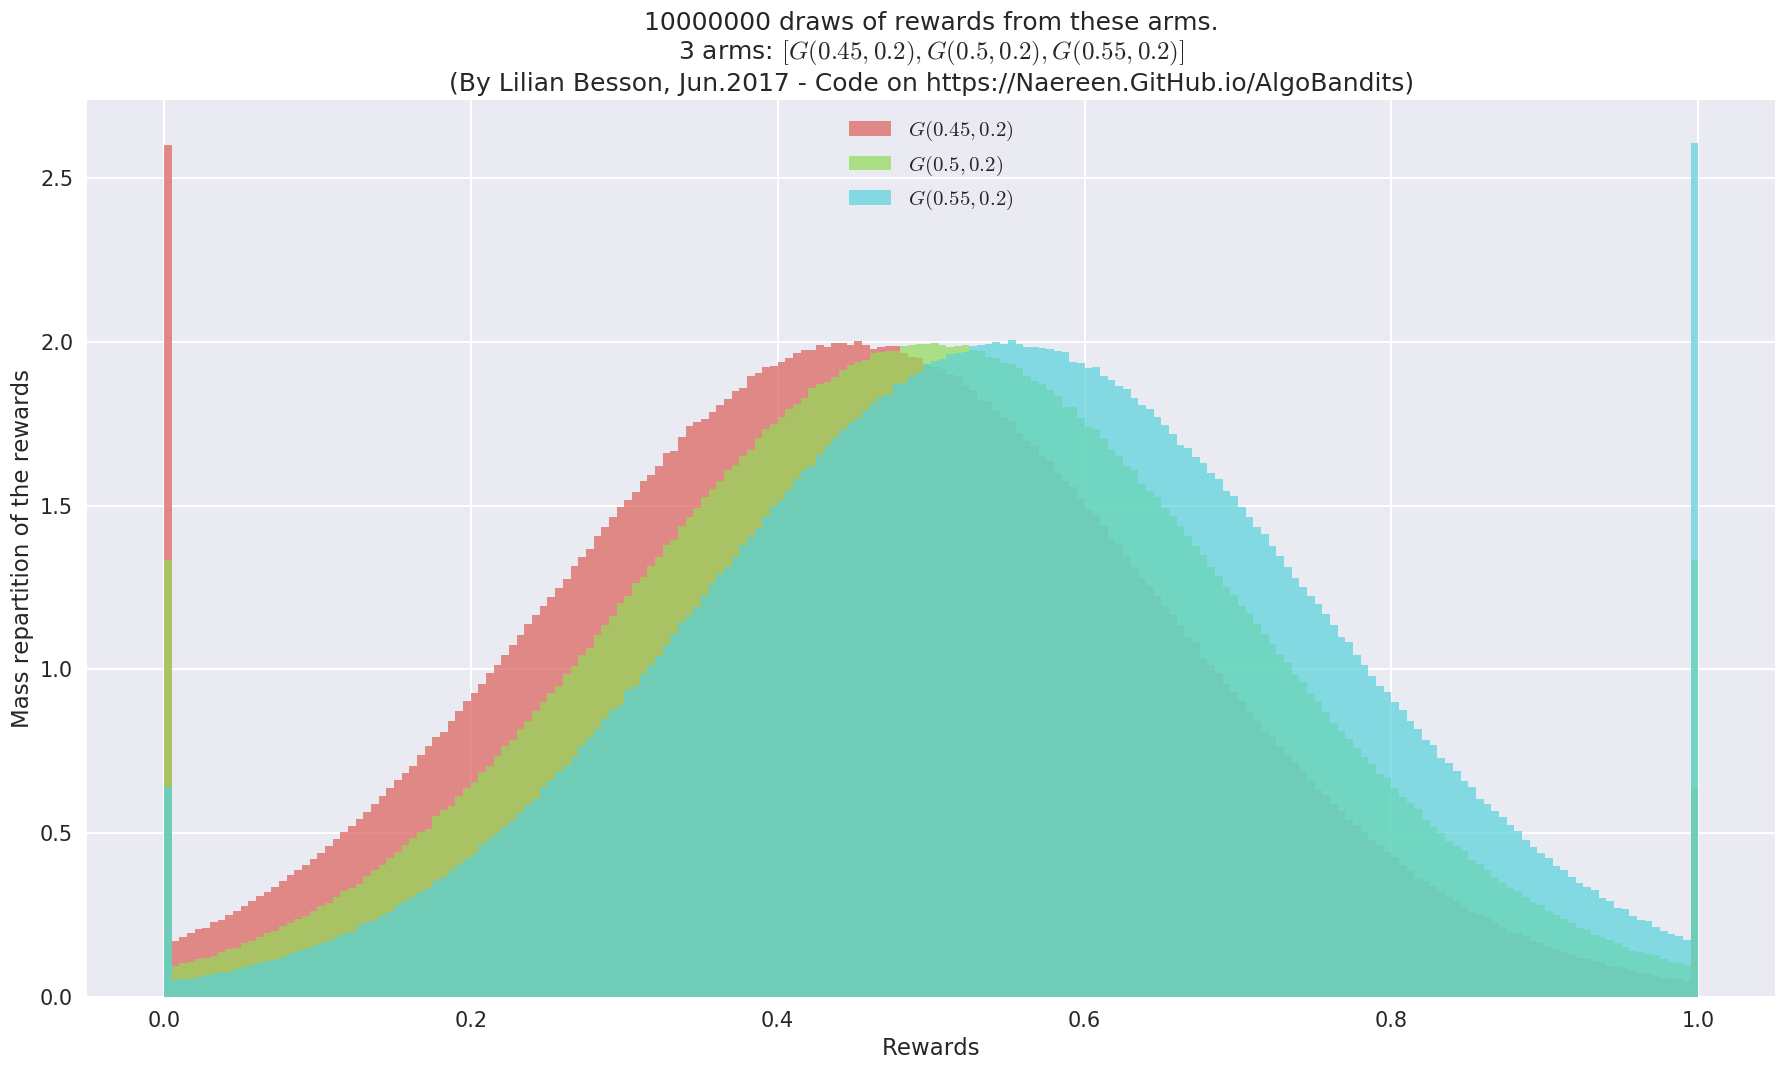

In [8]:
M.plotHistogram(horizon=10000000)

> As we can see, the rewards of the different arms are close. It won't be easy to distinguish them.

----
## Using a Black-Box optimization algorithm

I will present directly how to use any black-box optimization algorithm, following [`skopt` "ask-and-tell"](https://scikit-optimize.github.io/notebooks/ask-and-tell.html) API.

The optimization algorithm, `opt`, needs two methods:

- `opt.tell`, used like `opt.tell([armId], loss)`, to give an observation of a certain "loss" (`loss = - reward`) from arm #`armId` to the algorithm.
- `opt.ask`, used like `asked = opt.ask()`, to ask the algorithm which arm should be sampled first.

Let use a simple *Black-Box Bayesian* algorithm, implemented in the [scikit-optimize (`skopt`)](https://scikit-optimize.github.io/) package: [`RandomForestRegressor`](https://scikit-optimize.github.io/learning/index.html#skopt.learning.RandomForestRegressor).

In [9]:
from skopt.learning import RandomForestRegressor

First, we need to create a model.

In [10]:
our_est = RandomForestRegressor()

In [11]:
our_est?

Type:        RandomForestRegressor
String form:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='a <...> imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Length:      0
File:        /usr/local/lib/python3.5/dist-packages/skopt/learning/forest.py
Docstring:   RandomForestRegressor that supports `return_std`.



Then the optimization process is using the [`Optimizer`](https://scikit-optimize.github.io/#skopt.Optimizer) class from [`skopt`](https://scikit-optimize.github.io/).

In [12]:
from skopt import Optimizer

In [13]:
def arms_optimizer(nbArms, est):
    return Optimizer([
            list(range(nbArms))  # Categorical dimensions: arm index!
        ],
        est(),
        acq_optimizer="sampling",
        n_random_starts=3 * nbArms  # Sure ?
    )

In [14]:
our_opt = arms_optimizer(M.nbArms, RandomForestRegressor)

In [15]:
our_opt?

Type:        Optimizer
String form: <skopt.optimizer.optimizer.Optimizer object at 0x7efda4b6a550>
File:        /usr/local/lib/python3.5/dist-packages/skopt/optimizer/optimizer.py
Docstring:  
Run bayesian optimisation loop.

An `Optimizer` represents the steps of a bayesian optimisation loop. To
use it you need to provide your own loop mechanism. The various
optimisers provided by `skopt` use this class under the hood.

Use this class directly if you want to control the iterations of your
bayesian optimisation loop.

Parameters
----------
* `dimensions` [list, shape=(n_dims,)]:
    List of search space dimensions.
    Each search dimension can be defined either as

    - a `(upper_bound, lower_bound)` tuple (for `Real` or `Integer`
      dimensions),
    - a `(upper_bound, lower_bound, "prior")` tuple (for `Real`
      dimensions),
    - as a list of categories (for `Categorical` dimensions), or
    - an instance of a `Dimension` object (`Real`, `Integer` or
      `Categorical`).

* `

### Implementation
In code, this gives the following:

- the `getReward(arm, reward)` method gives `loss = 1 - reward` to the optimization process, with `opt.tell` method,
- the `choice()` simply calls `opt.ask()`.

Note that the Bayesian optimization takes place with an input space of categorial data: instead of optimizing in $\mathbb{R}$ or $\mathbb{R}^K$ (for $K$ arms), the input space is a categorical representation of $\{1,\dots,K\}$.

In [16]:
class BlackBoxOpt(object):
    """Black-box Bayesian optimizer for Multi-Armed Bandit, using Gaussian processes.
    
    - **Warning**: still highly experimental! Very slow!
    """

    def __init__(self, nbArms,
                 opt=arms_optimizer, est=RandomForestRegressor,
                 lower=0., amplitude=1.,  # not used, but needed for my framework
                 ):
        self.nbArms = nbArms  #: Number of arms of the MAB problem.
        self.t = -1  #: Current time.
        # Black-box optimizer
        self._opt = opt  # Store it
        self._est = est  # Store it
        self.opt = opt(nbArms, est)  #: The black-box optimizer to use, initialized from the other arguments
        # Other attributes
        self.lower = lower  #: Known lower bounds on the rewards.
        self.amplitude = amplitude  #: Known amplitude of the rewards.

    # --- Easy methods

    def __str__(self):
        return "BlackBoxOpt({}, {})".format(self._opt.__name__, self._est.__name__)

    def startGame(self):
        """ Reinitialize the black-box optimizer."""
        self.t = -1
        self.opt = self._opt(self.nbArms, self._est)  # The black-box optimizer to use, initialized from the other arguments

    def getReward(self, armId, reward):
        """ Store this observation `reward` for that arm `armId`.

        - In fact, :class:`skopt.Optimizer` is a *minimizer*, so `loss=1-reward` is stored, to maximize the rewards by minimizing the losses.
        """
        reward = (reward - self.lower) / self.amplitude  # project the reward to [0, 1]
        loss = 1. - reward  # flip
        return self.opt.tell([armId], loss)

    def choice(self):
        r""" Choose an arm, according to the black-box optimizer."""
        self.t += 1
        asked = self.opt.ask()
        # That's a np.array of int, as we use Categorical input dimension!
        arm = int(np.round(asked[0]))
        return arm

In [17]:
BlackBoxOpt?

Init signature: BlackBoxOpt(nbArms, opt=<function arms_optimizer at 0x7efda4b61488>, est=<class 'skopt.learning.forest.RandomForestRegressor'>, lower=0.0, amplitude=1.0)
Docstring:     
Black-box Bayesian optimizer for Multi-Armed Bandit, using Gaussian processes.

- **Warning**: still highly experimental! Very slow!
Type:           type



For example, for the problem $M$ defined above, for $K=3$ arms, this gives the following policy:

In [18]:
policy = BlackBoxOpt(M.nbArms)
policy?

Type:        BlackBoxOpt
String form: BlackBoxOpt(arms_optimizer, RandomForestRegressor)
Docstring:  
Black-box Bayesian optimizer for Multi-Armed Bandit, using Gaussian processes.

- **Warning**: still highly experimental! Very slow!



----
## Comparing its performance on this Gaussian problem

We can compare the performance of this `BlackBoxOpt` policy, using [Random Forest regression](https://scikit-optimize.github.io/learning/index.html#skopt.learning.RandomForestRegressor), on the same Gaussian problem, against three strategies:

- [`EmpiricalMeans`](https://smpybandits.github.io/docs/Policies.EmpiricalMeans.html#Policies.EmpiricalMeans.EmpiricalMeans), which only uses the empirical mean estimators $\hat{\mu_k}(t)$. It is known to be insufficient.
- [`UCB`](https://smpybandits.github.io/docs/Policies.UCB.html#Policies.UCB.UCB), the UCB1 algorithm. It is known to be quite efficient.
- [`Thompson`](https://smpybandits.github.io/docs/Policies.Thompson.html#Policies.Thompson.Thompson), the Thompson Sampling algorithm. It is known to be very efficient.
- [`klUCB`](https://smpybandits.github.io/docs/Policies.klUCB.html#Policies.klUCB.klUCB), the kl-UCB algorithm, for Gaussian arms (`klucb = klucbGauss`). It is also known to be very efficient.

### Configuring an experiment
I implemented in the [`Environment`](http://https://smpybandits.github.io/docs/Environment.html) module an [`Evaluator`](http://https://smpybandits.github.io/docs/Environment.Evaluator.html#Environment.Evaluator.Evaluator) class, very convenient to run experiments of Multi-Armed Bandit games without a sweat.

Let us use it!

In [19]:
from Environment import Evaluator

We will start with a small experiment, with a small horizon $T = 2000$ and only $20$ repetitions.
(we should do more, but it is very slow due to `BlackBoxOpt`...)

In [20]:
HORIZON = 2000
REPETITIONS = 20
N_JOBS = min(REPETITIONS, 3)
means = [0.45, 0.5, 0.55]
ENVIRONMENTS = [ [Gaussian(mu, sigma=0.2) for mu in means] ]

In [21]:
from Policies import EmpiricalMeans, UCB, Thompson, klUCB
from Policies import klucb_mapping, klucbGauss as _klucbGauss

sigma = 0.2
# Custom klucb function
def klucbGauss(x, d, precision=0.):
    """klucbGauss(x, d, sig2) with the good variance (= sigma)."""
    return _klucbGauss(x, d, sigma)

klucb = klucbGauss

Info: numba.jit seems to be available.


In [22]:
POLICIES = [
        # --- Naive algorithms
        {
            "archtype": EmpiricalMeans,
            "params": {}
        },
        # --- Our algorithm, with two Unsupervised Learning algorithms
        {
            "archtype": BlackBoxOpt,
            "params": {}
        },
        # --- Basic UCB1 algorithm
        {
            "archtype": UCB,
            "params": {}
        },
        # --- Thompson sampling algorithm
        {
            "archtype": Thompson,
            "params": {}
        },
        # --- klUCB algorithm, with Gaussian klucb function
        {
            "archtype": klUCB,
            "params": {
                "klucb": klucb
            }
        },
    ]

In [23]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}

In [24]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 5
Time horizon: 2000
Number of repetitions: 20
Sampling rate for saving, delta_t_save: 1
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 3
Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)] ...
 - with 'arms' = [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)]
 - with 'means' = [ 0.45  0.5   0.55]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.55
 - with 'minArm' = 0.45

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...
 - with 'arms' represented as: $[G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)^*]$
Number of environments to try: 1


### Running an experiment

We asked to repeat the experiment $20$ times, so it will take a while... (about 100 minutes maximum).

In [25]:
from Environment import tqdm  # just a pretty loop

In [26]:
%%time
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)


Evaluating environment: MAB(nbArms: 3, arms: [G(0.45, 0.2), G(0.5, 0.2), G(0.55, 0.2)], minArm: 0.45, maxArm: 0.55)
- Adding policy #1 = {'archtype': <class 'Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'Policies.EmpiricalMeans.EmpiricalMeans'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #4 = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][3]' = {'archtype': <class 'Policies.Thompson.Thomp


Estimated order by the policy EmpiricalMeans after 2000 steps: [1 0 2] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 55.56% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 39.85% (relative success)...
  ==> Spearman    distance from optimal ordering: 33.33% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 48.85% (relative success)...

- Evaluating policy #2/5: BlackBoxOpt(arms_optimizer, RandomForestRegressor) ...


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    0.6s finished


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 14.5min



- Evaluating policy #3/5: UCB ...


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed: 33.6min finished



Estimated order by the policy UCB after 2000 steps: [1 0 2] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 55.56% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 39.85% (relative success)...
  ==> Spearman    distance from optimal ordering: 33.33% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 48.85% (relative success)...

- Evaluating policy #4/5: Thompson ...


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    0.6s finished



Estimated order by the policy Thompson after 2000 steps: [1 2 0] ...
  ==> Optimal arm identification: 81.82% (relative success)...
  ==> Manhattan   distance from optimal ordering: 11.11% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 39.85% (relative success)...
  ==> Spearman    distance from optimal ordering: 33.33% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 37.74% (relative success)...

- Evaluating policy #5/5: KL-UCB(Gauss) ...


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    0.6s finished



Estimated order by the policy KL-UCB(Gauss) after 2000 steps: [0 1 2] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 100.00% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 88.28% (relative success)...
  ==> Spearman    distance from optimal ordering: 100.00% (relative success)...
  ==> Gestalt     distance from optimal ordering: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 97.07% (relative success)...


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.9s



CPU times: user 1.57 s, sys: 464 ms, total: 2.04 s
Wall time: 33min 42s


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    2.0s finished


### Visualizing the results
Now, we can plot some performance measures, like the regret, the best arm selection rate, the average reward etc.

In [27]:
def plotAll(evaluation, envId=0):
    evaluation.printFinalRanking(envId)
    evaluation.plotRegrets(envId)
    evaluation.plotRegrets(envId, semilogx=True)
    evaluation.plotRegrets(envId, meanRegret=True)
    evaluation.plotBestArmPulls(envId)

In [28]:
evaluation?

Type:        Evaluator
String form: <Environment.Evaluator.Evaluator object at 0x7efda4b6aac8>
File:        ~/ownCloud/cloud.openmailbox.org/Thèse_2016-17/src/SMPyBandits.git/Environment/Evaluator.py
Docstring:   Evaluator class to run the simulations.




Final ranking for this environment #0 :
- Policy 'Thompson'	was ranked	1 / 5 for this simulation (last regret = 30.2294).
- Policy 'KL-UCB(Gauss)'	was ranked	2 / 5 for this simulation (last regret = 33.7103).
- Policy 'BlackBoxOpt(arms_optimizer, RandomForestRegressor)'	was ranked	3 / 5 for this simulation (last regret = 43.7773).
- Policy 'EmpiricalMeans'	was ranked	4 / 5 for this simulation (last regret = 48.0636).
- Policy 'UCB'	was ranked	5 / 5 for this simulation (last regret = 61.1631).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...


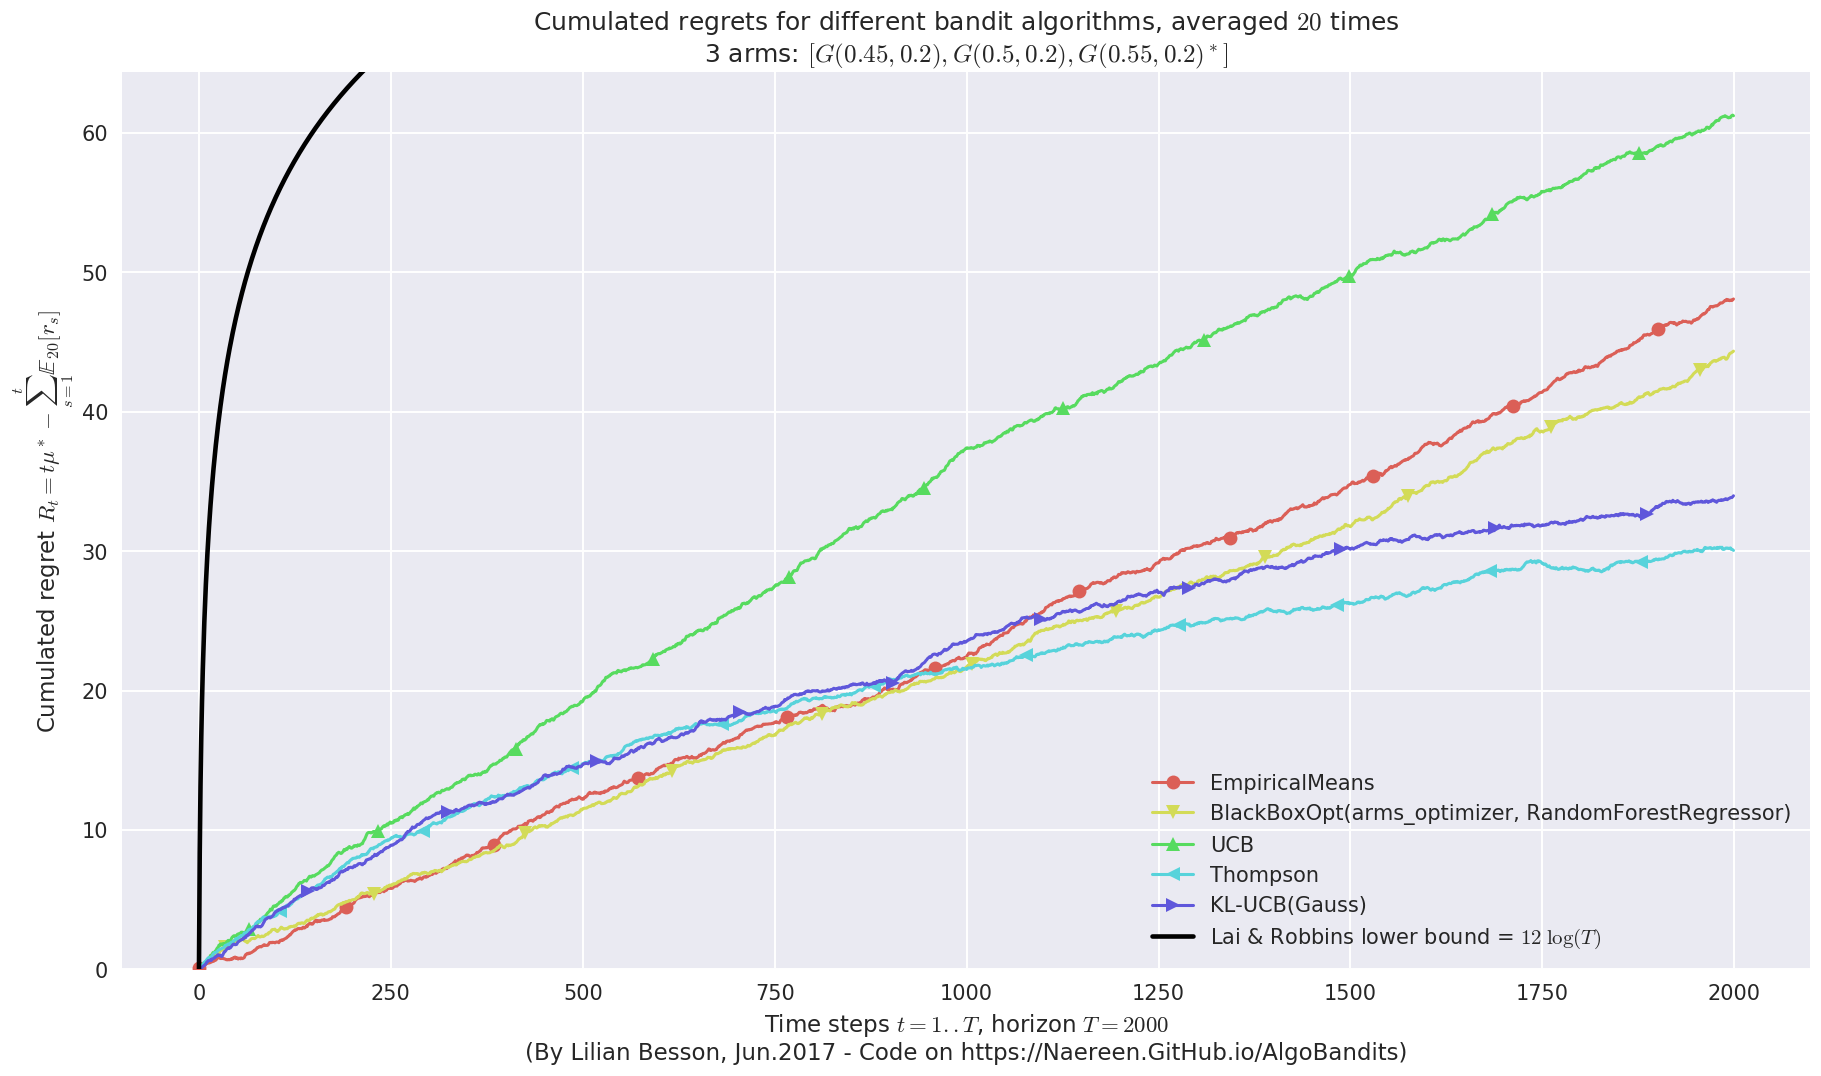


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...


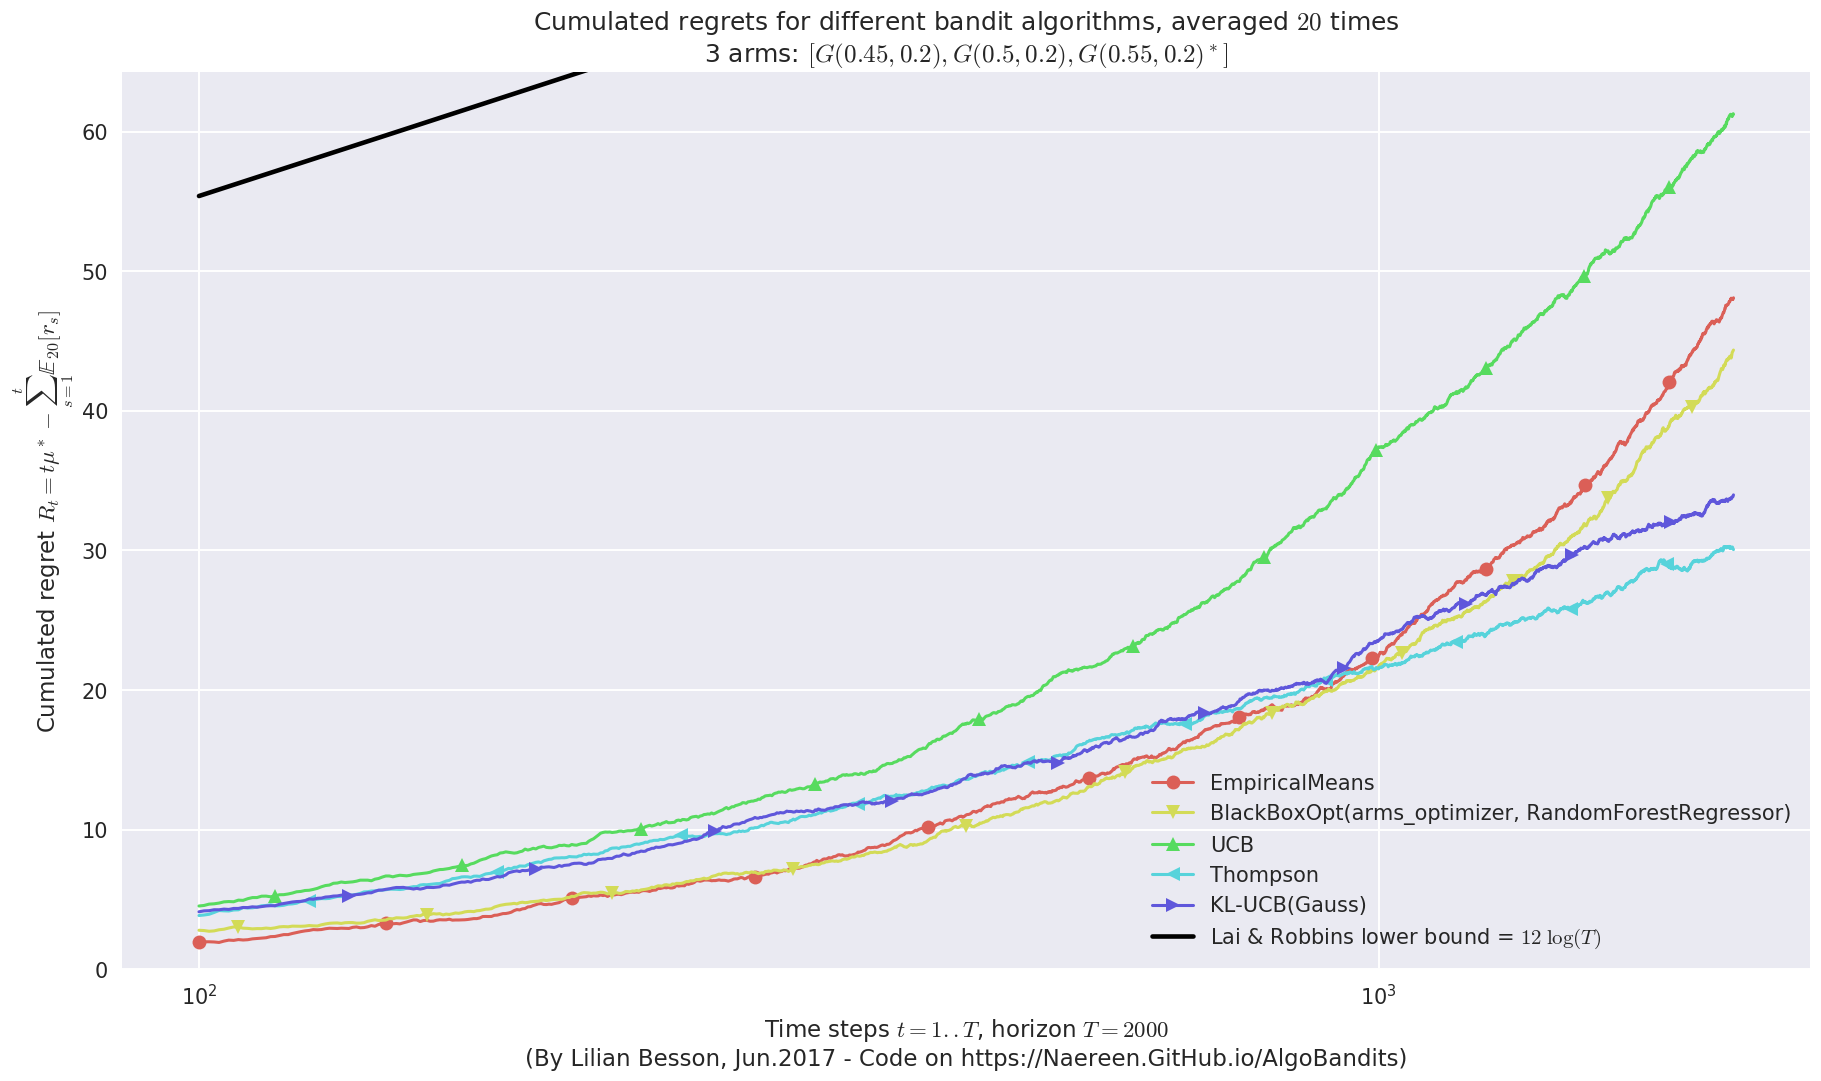


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 12 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 61.67% ...


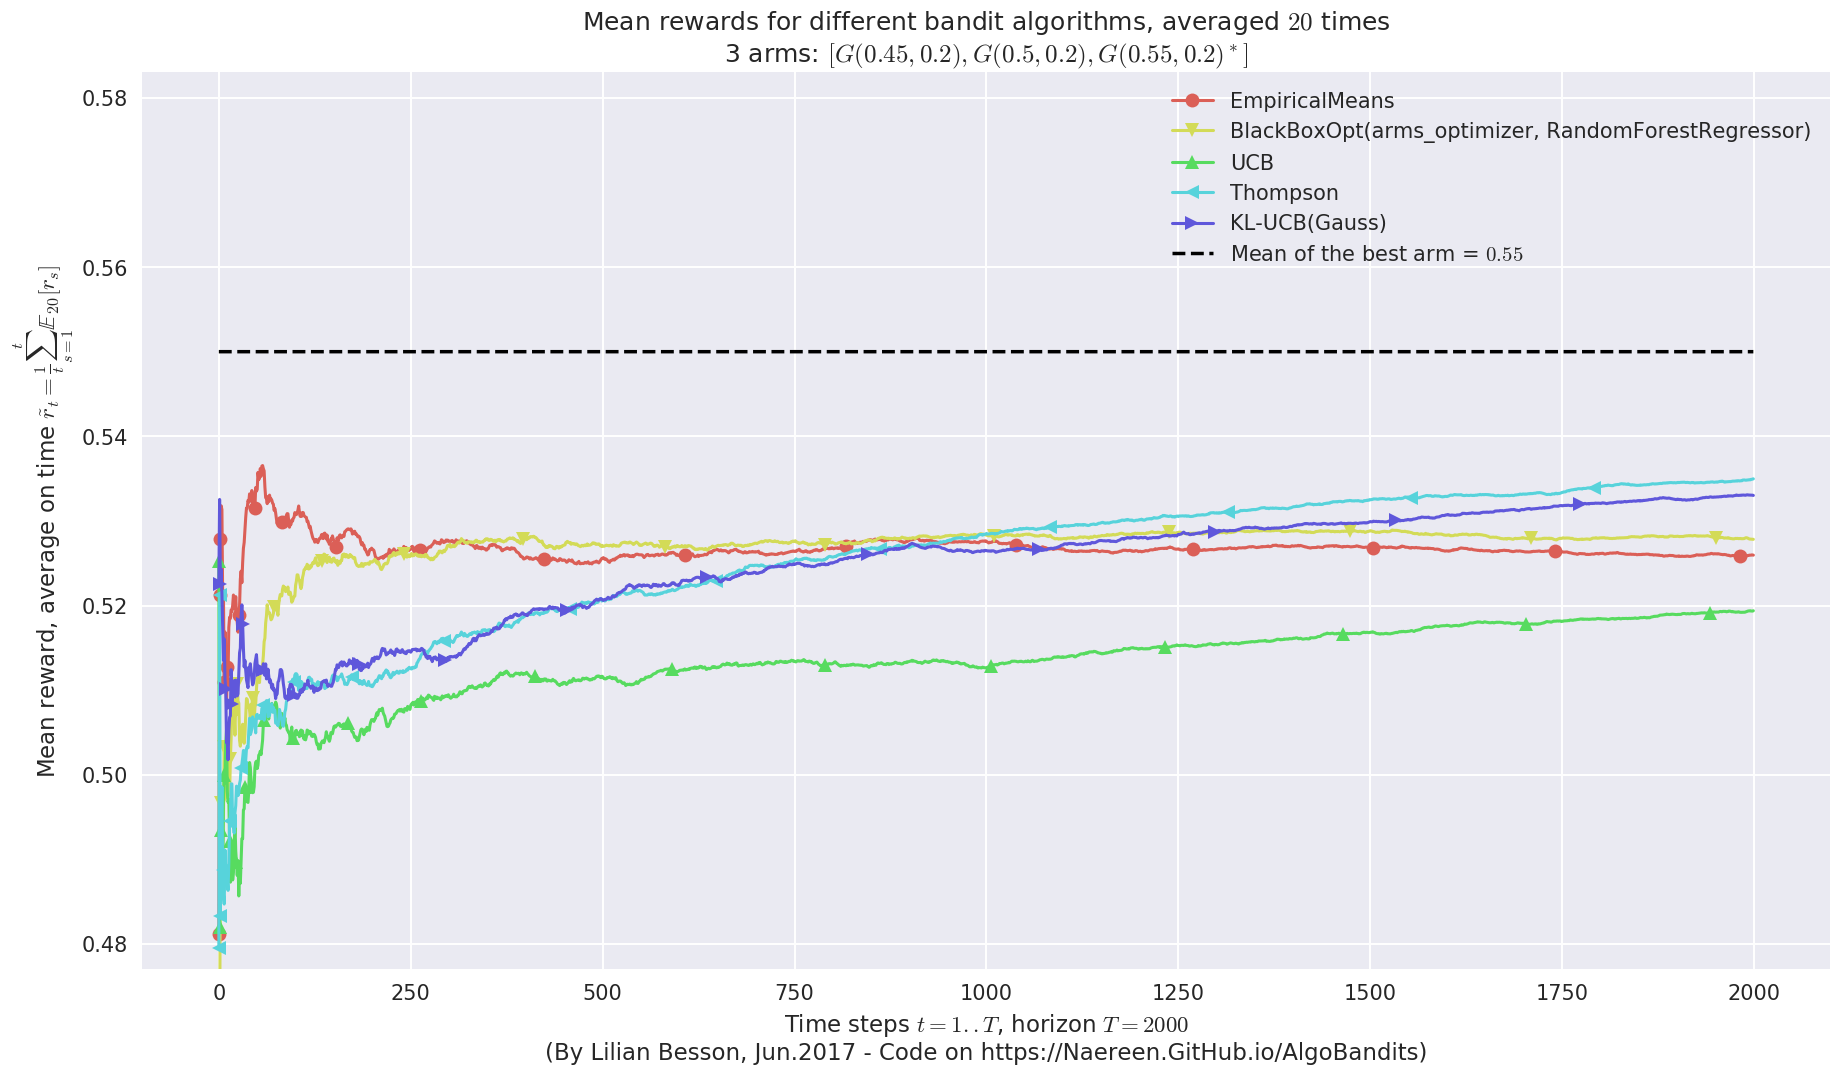

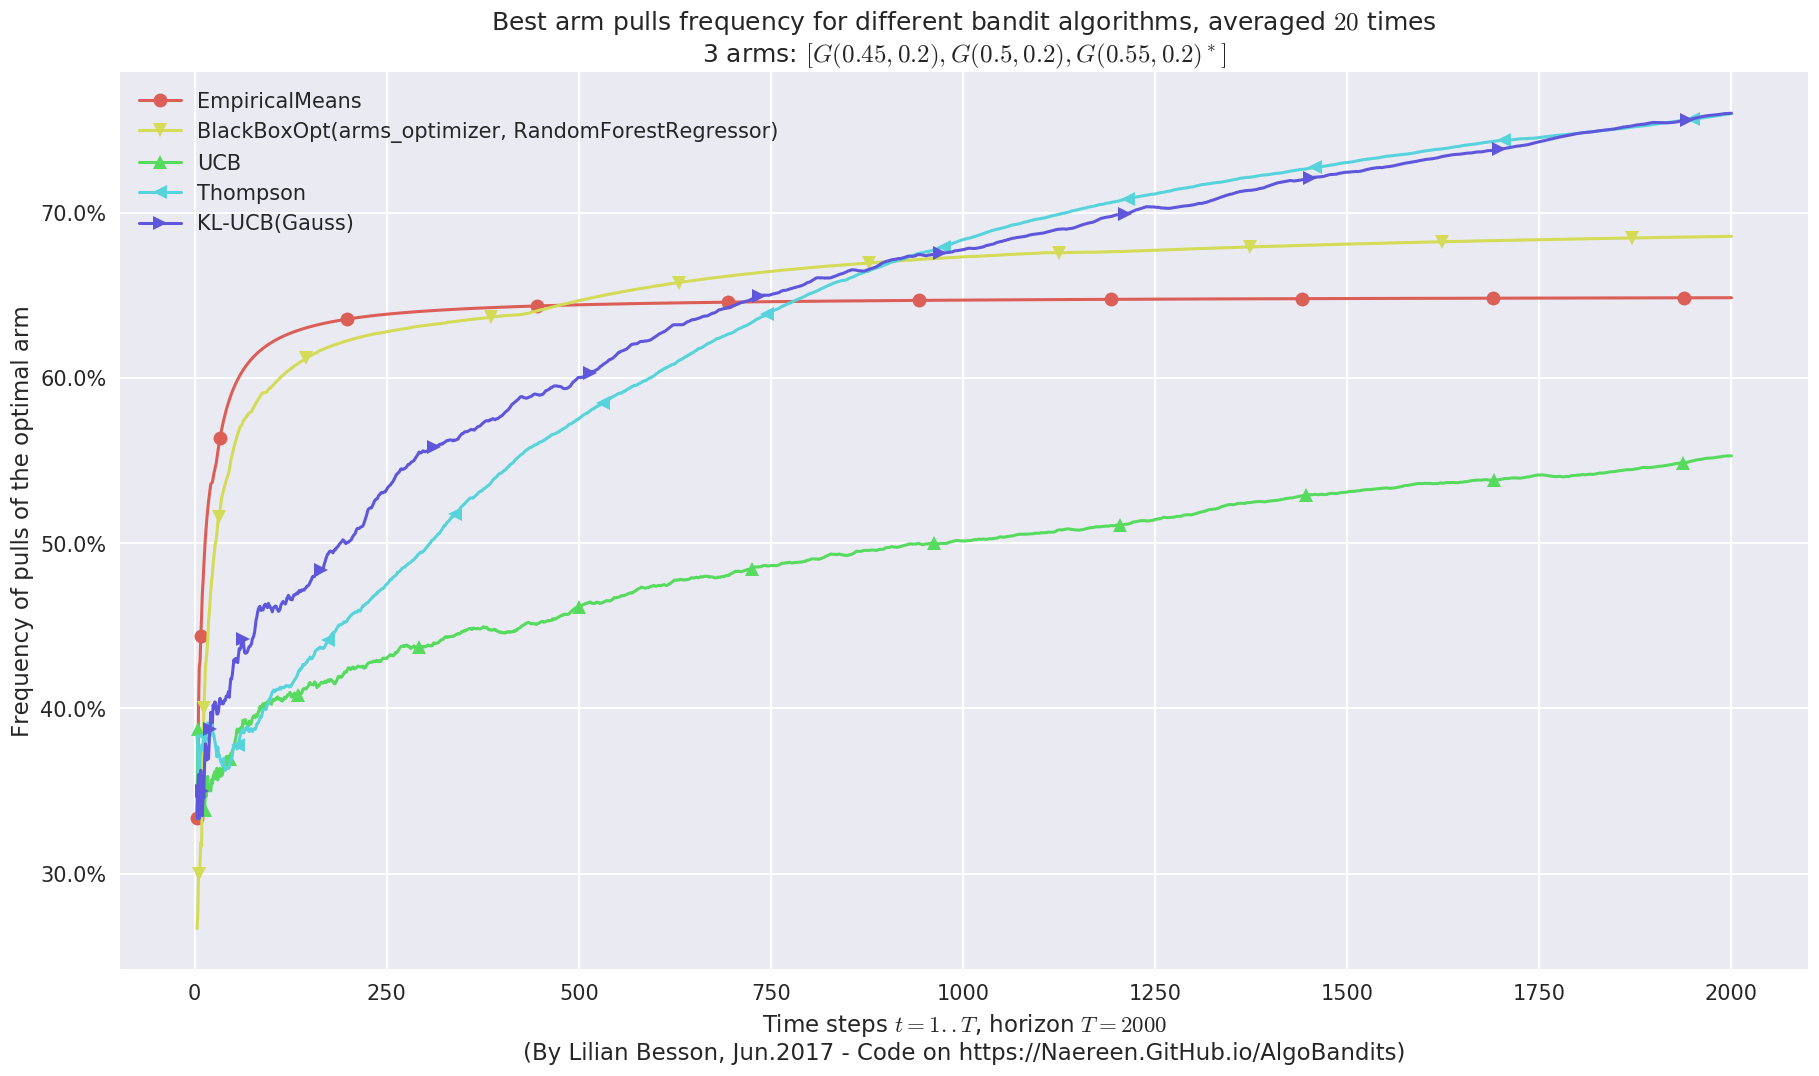

In [29]:
plotAll(evaluation)

----
## Another experiment, with just more Gaussian arms

This second experiment will be similar, except we consider more arms.
As they are all very close to each other, with a gap $\Delta = 0.05$, it gets much harder!

In [30]:
HORIZON = 2000
REPETITIONS = 20
N_JOBS = min(REPETITIONS, 4)
means = [0.30, 0.35, 0.40, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70]
ENVIRONMENTS = [ [Gaussian(mu, sigma=0.25) for mu in means] ]

In [31]:
POLICIES = [
        # --- Our algorithm, with two Unsupervised Learning algorithms
        {
            "archtype": BlackBoxOpt,
            "params": {}
        },
        # --- Basic UCB1 algorithm
        {
            "archtype": UCB,
            "params": {}
        },
        # --- Thompson sampling algorithm
        {
            "archtype": Thompson,
            "params": {}
        },
        # --- klUCB algorithm, with Gaussian klucb function
        {
            "archtype": klUCB,
            "params": {
                "klucb": klucb
            }
        },
    ]

In [32]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}

In [33]:
evaluation2 = Evaluator(configuration)

Number of policies in this comparison: 4
Time horizon: 2000
Number of repetitions: 20
Sampling rate for saving, delta_t_save: 1
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 4
Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.3, 0.25), G(0.35, 0.25), G(0.4, 0.25), G(0.45, 0.25), G(0.5, 0.25), G(0.55, 0.25), G(0.6, 0.25), G(0.65, 0.25), G(0.7, 0.25)] ...
 - with 'arms' = [G(0.3, 0.25), G(0.35, 0.25), G(0.4, 0.25), G(0.45, 0.25), G(0.5, 0.25), G(0.55, 0.25), G(0.6, 0.25), G(0.65, 0.25), G(0.7, 0.25)]
 - with 'means' = [ 0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7 ]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.7
 - with 'minArm' = 0.3

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.2 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...
 - with 'arms' represented as: $[G(0.3, 0.25), G(0.35, 0.25), G(0.4, 0.25), G(0.45, 0.25), G(0.5, 0.25), G(0.55, 0.25),

### Running the experiment

We asked to repeat the experiment $20$ times, so it will take a while...

In [34]:
%%time
for envId, env in tqdm(enumerate(evaluation2.envs), desc="Problems"):
    # Evaluate just that env
    evaluation2.startOneEnv(envId, env)


Evaluating environment: MAB(nbArms: 9, arms: [G(0.3, 0.25), G(0.35, 0.25), G(0.4, 0.25), G(0.45, 0.25), G(0.5, 0.25), G(0.55, 0.25), G(0.6, 0.25), G(0.65, 0.25), G(0.7, 0.25)], minArm: 0.3, maxArm: 0.7)
- Adding policy #1 = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
- Adding policy #4 = {'archtype': <class 'Policies.klUCB.klUCB'>, 'params': {'klucb': <function klucbGauss at 0x7efdb30d0268>}} ...
  Creatin

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done  17 out of  20 | elapsed: 36.7min remaining:  6.5min



- Evaluating policy #2/4: UCB ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 36.9min finished



Estimated order by the policy UCB after 2000 steps: [3 0 1 8 2 5 4 7 6] ...
  ==> Optimal arm identification: 85.71% (relative success)...
  ==> Manhattan   distance from optimal ordering: 60.49% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 90.47% (relative success)...
  ==> Spearman    distance from optimal ordering: 91.24% (relative success)...
  ==> Gestalt     distance from optimal ordering: 33.33% (relative success)...
  ==> Mean distance from optimal ordering: 68.88% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.2s



- Evaluating policy #3/4: Thompson ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.6s finished



Estimated order by the policy Thompson after 2000 steps: [5 1 2 4 0 3 6 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 70.37% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 93.94% (relative success)...
  ==> Spearman    distance from optimal ordering: 92.31% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 80.82% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s



- Evaluating policy #4/4: KL-UCB(Gauss) ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.7s finished



Estimated order by the policy KL-UCB(Gauss) after 2000 steps: [3 4 1 2 0 6 7 5 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 60.49% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 90.47% (relative success)...
  ==> Spearman    distance from optimal ordering: 94.19% (relative success)...
  ==> Gestalt     distance from optimal ordering: 55.56% (relative success)...
  ==> Mean distance from optimal ordering: 75.18% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.5s



CPU times: user 1.58 s, sys: 508 ms, total: 2.09 s
Wall time: 36min 56s


[Parallel(n_jobs=4)]: Done  17 out of  20 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.3s finished


### Visualizing the results
Now, we can plot some performance measures, like the regret, the best arm selection rate, the average reward etc.


Final ranking for this environment #0 :
- Policy 'BlackBoxOpt(arms_optimizer, RandomForestRegressor)'	was ranked	1 / 4 for this simulation (last regret = 101.943).
- Policy 'Thompson'	was ranked	2 / 4 for this simulation (last regret = 109.463).
- Policy 'KL-UCB(Gauss)'	was ranked	3 / 4 for this simulation (last regret = 110.81).
- Policy 'UCB'	was ranked	4 / 4 for this simulation (last regret = 218.572).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.2 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


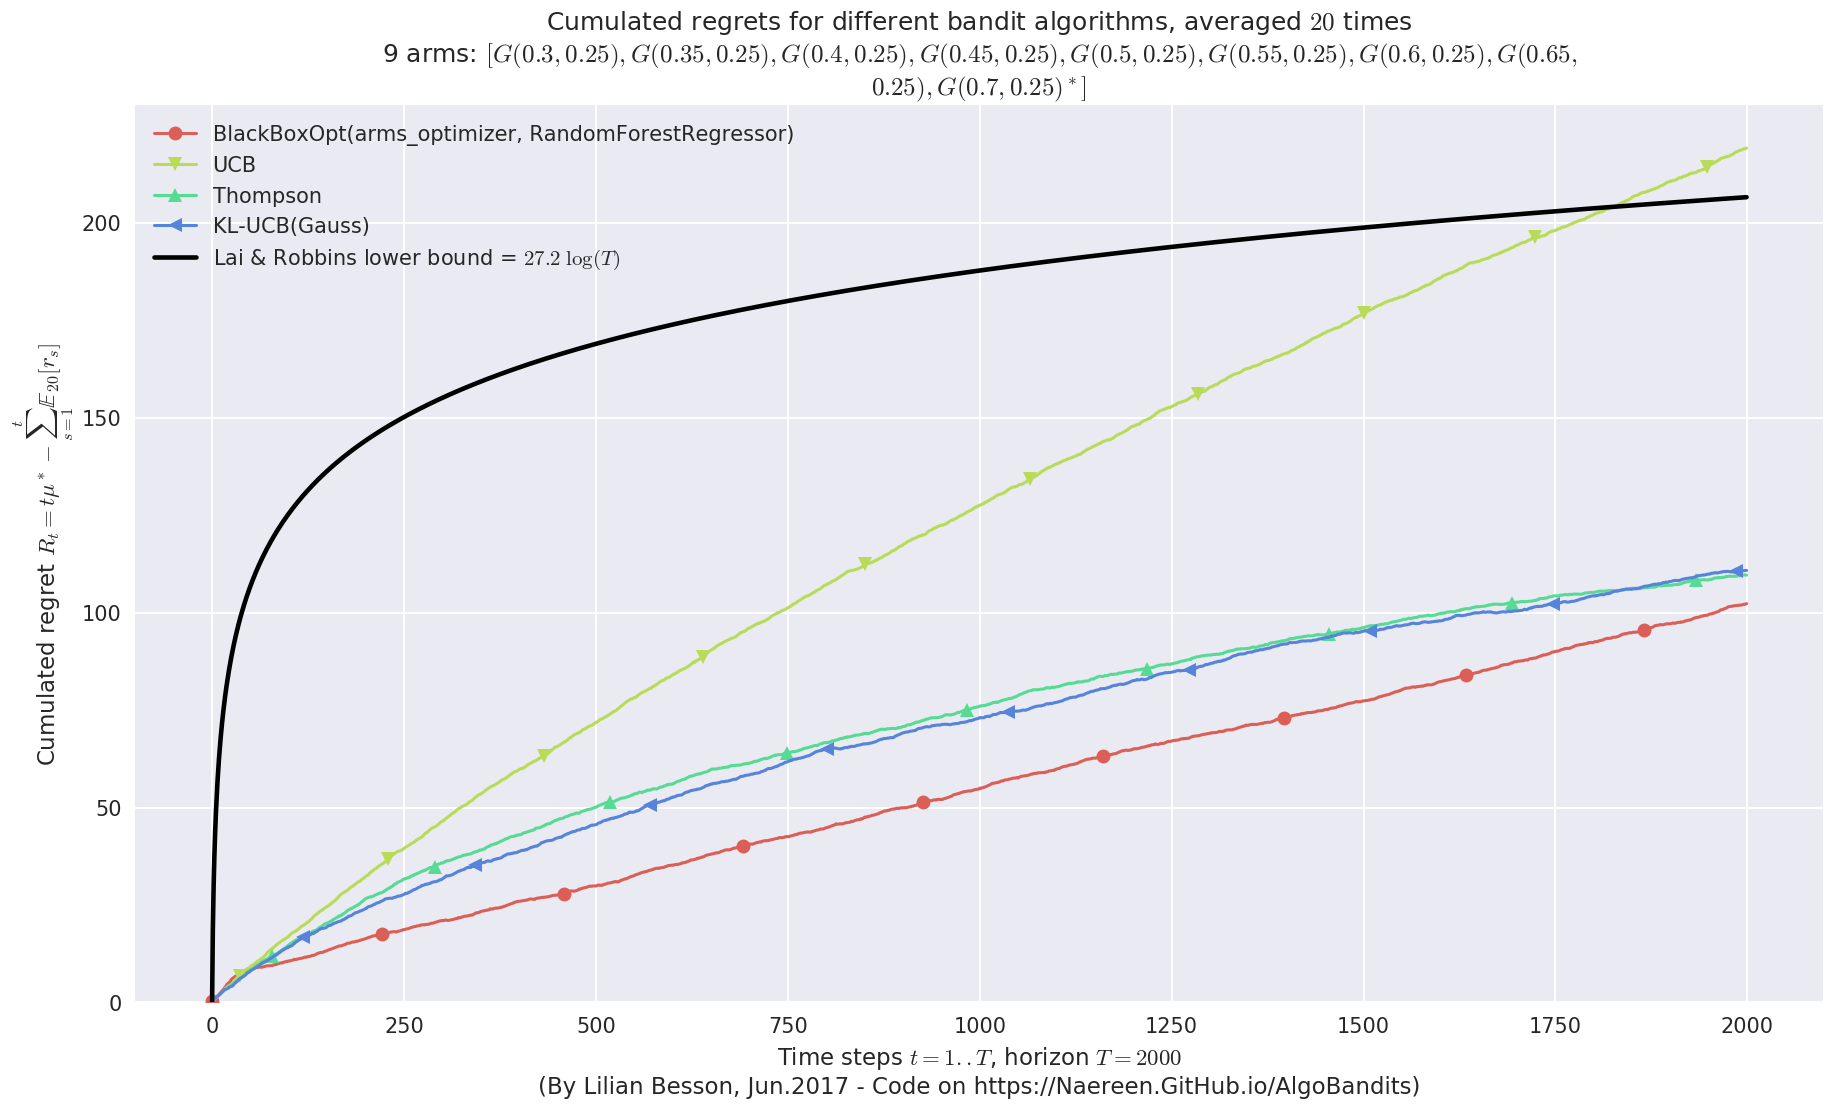


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.2 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


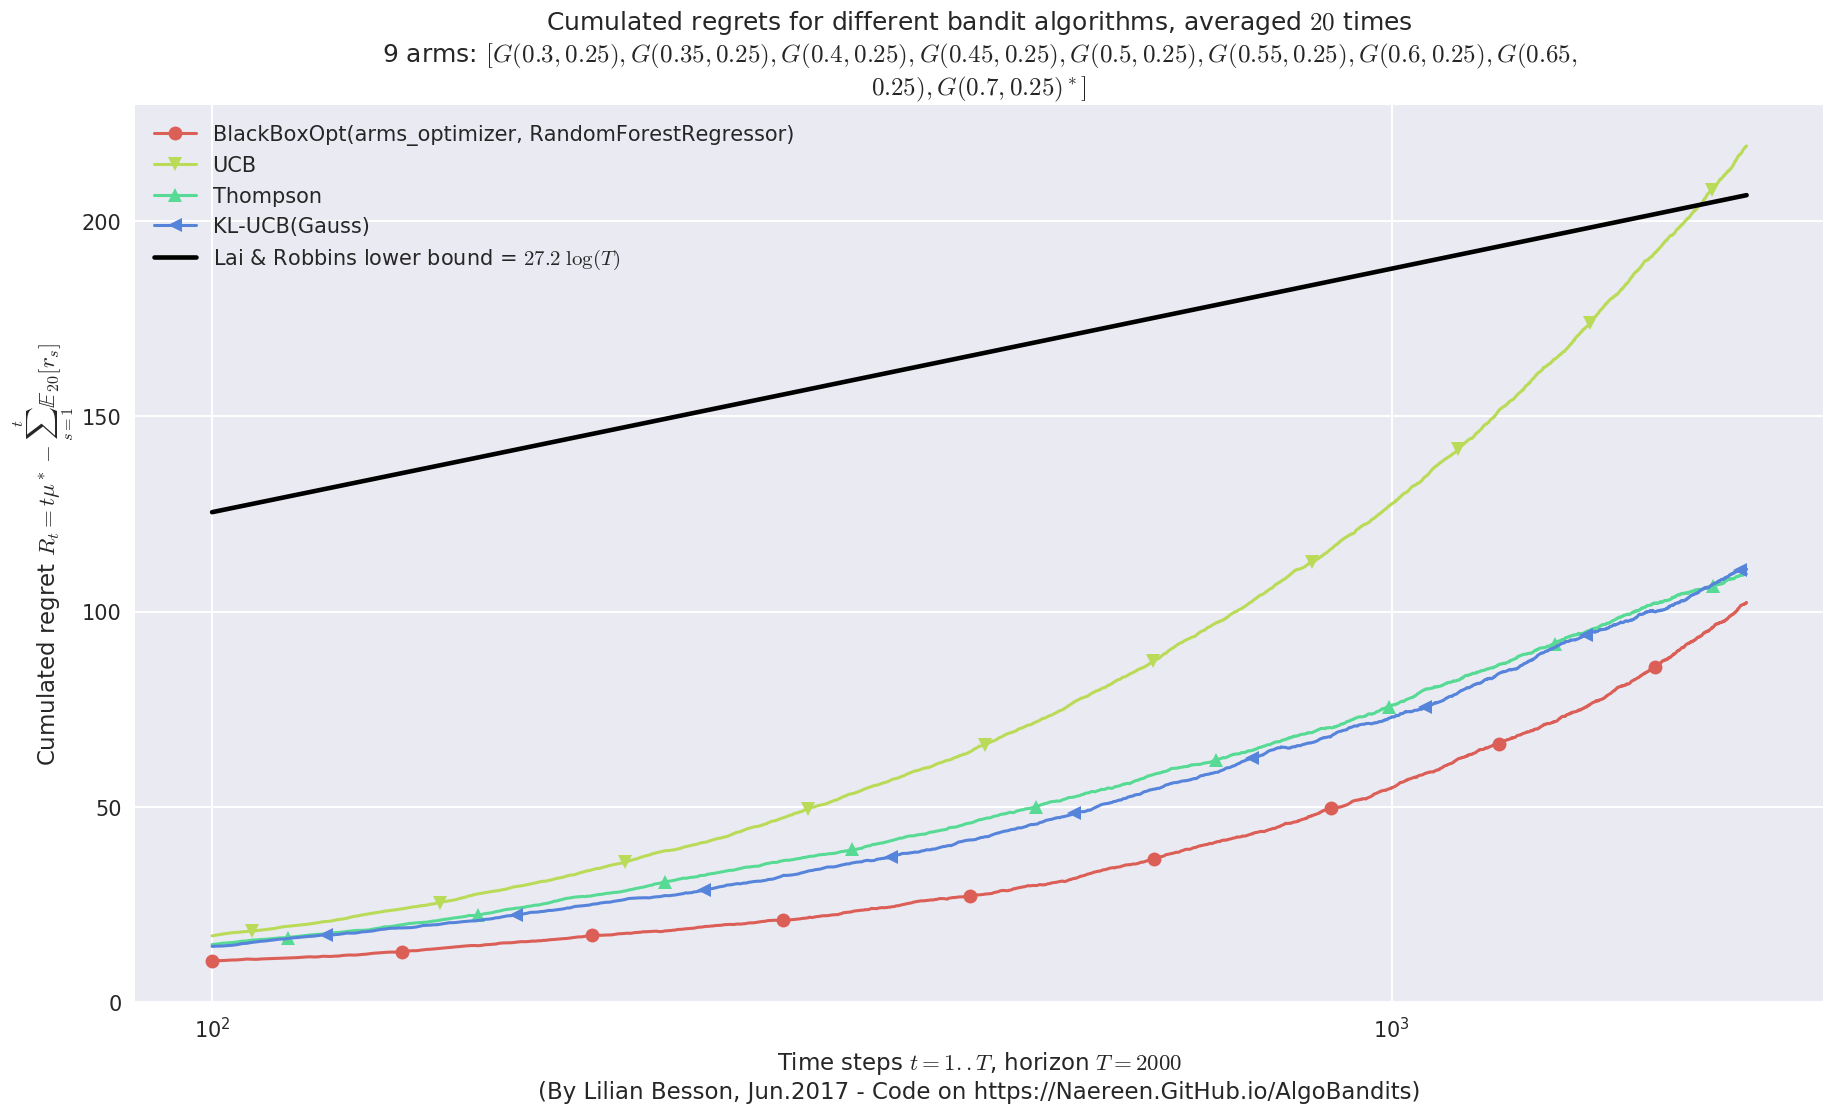


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.2 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


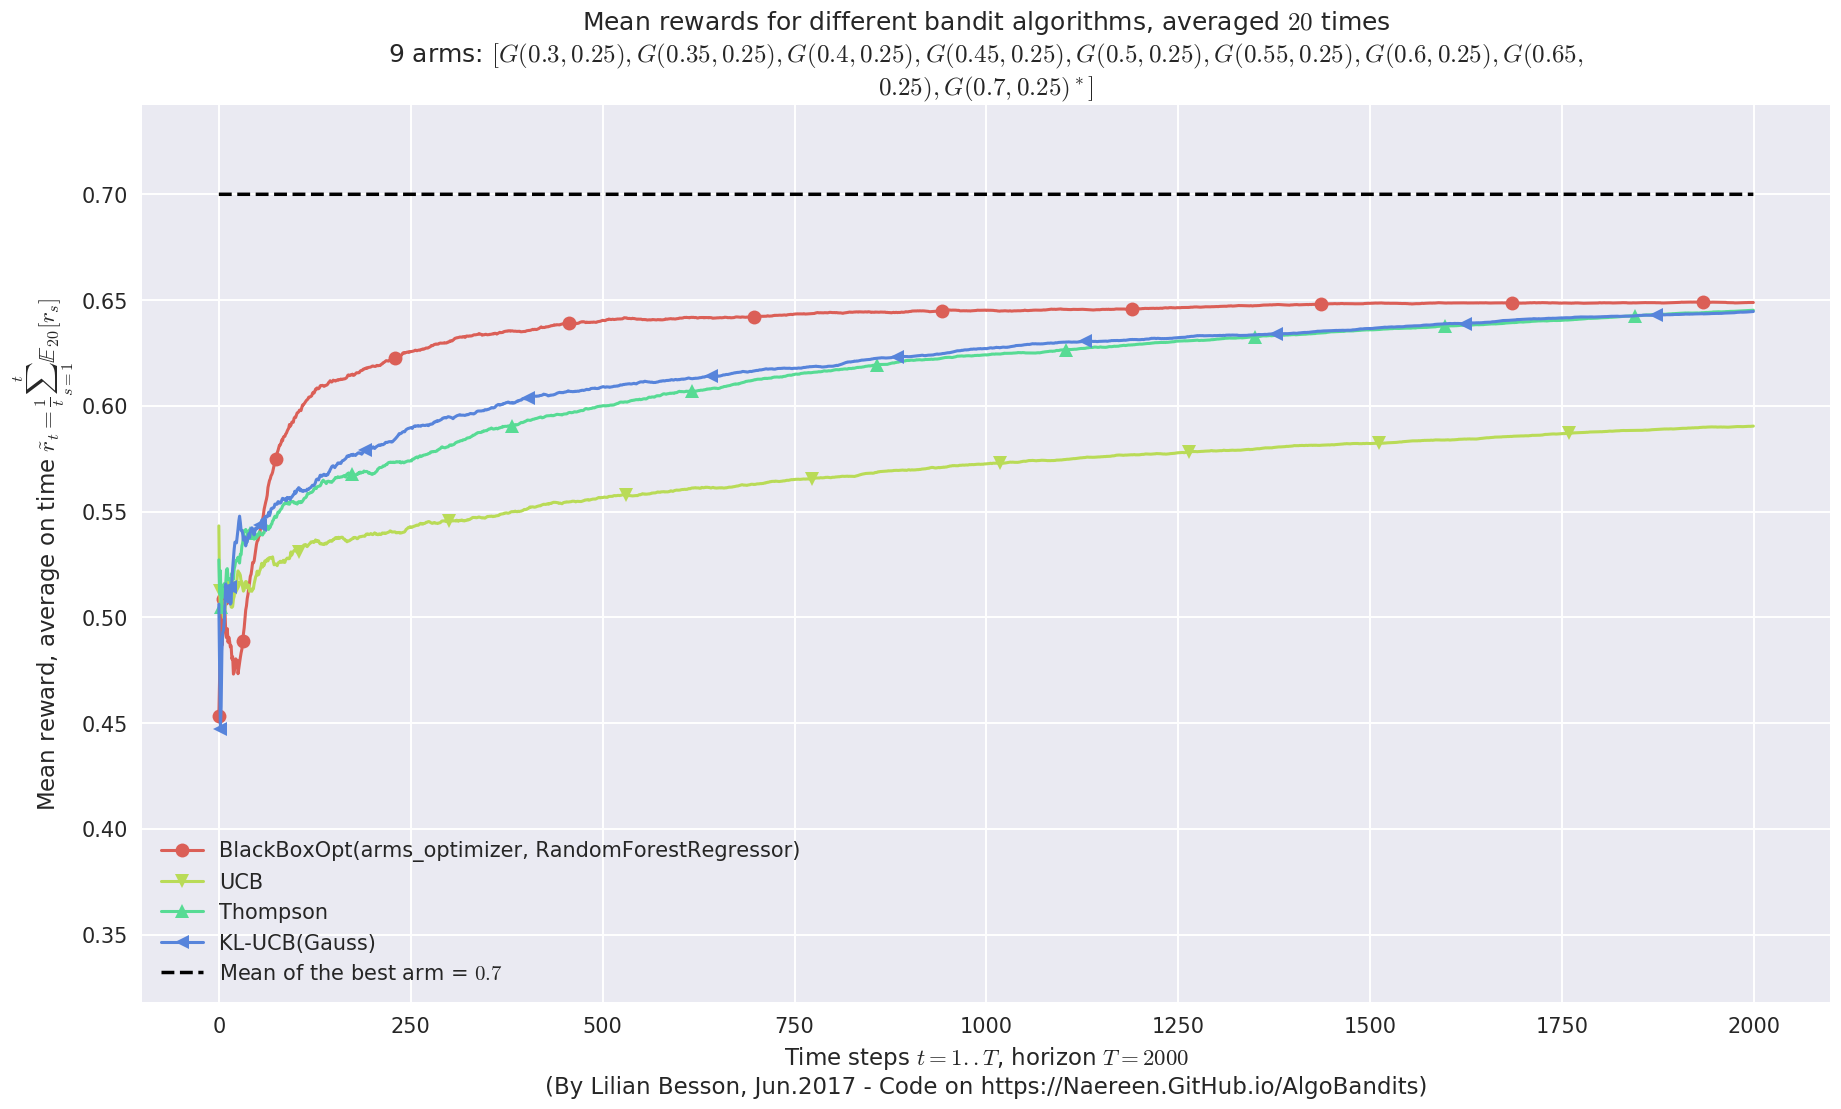

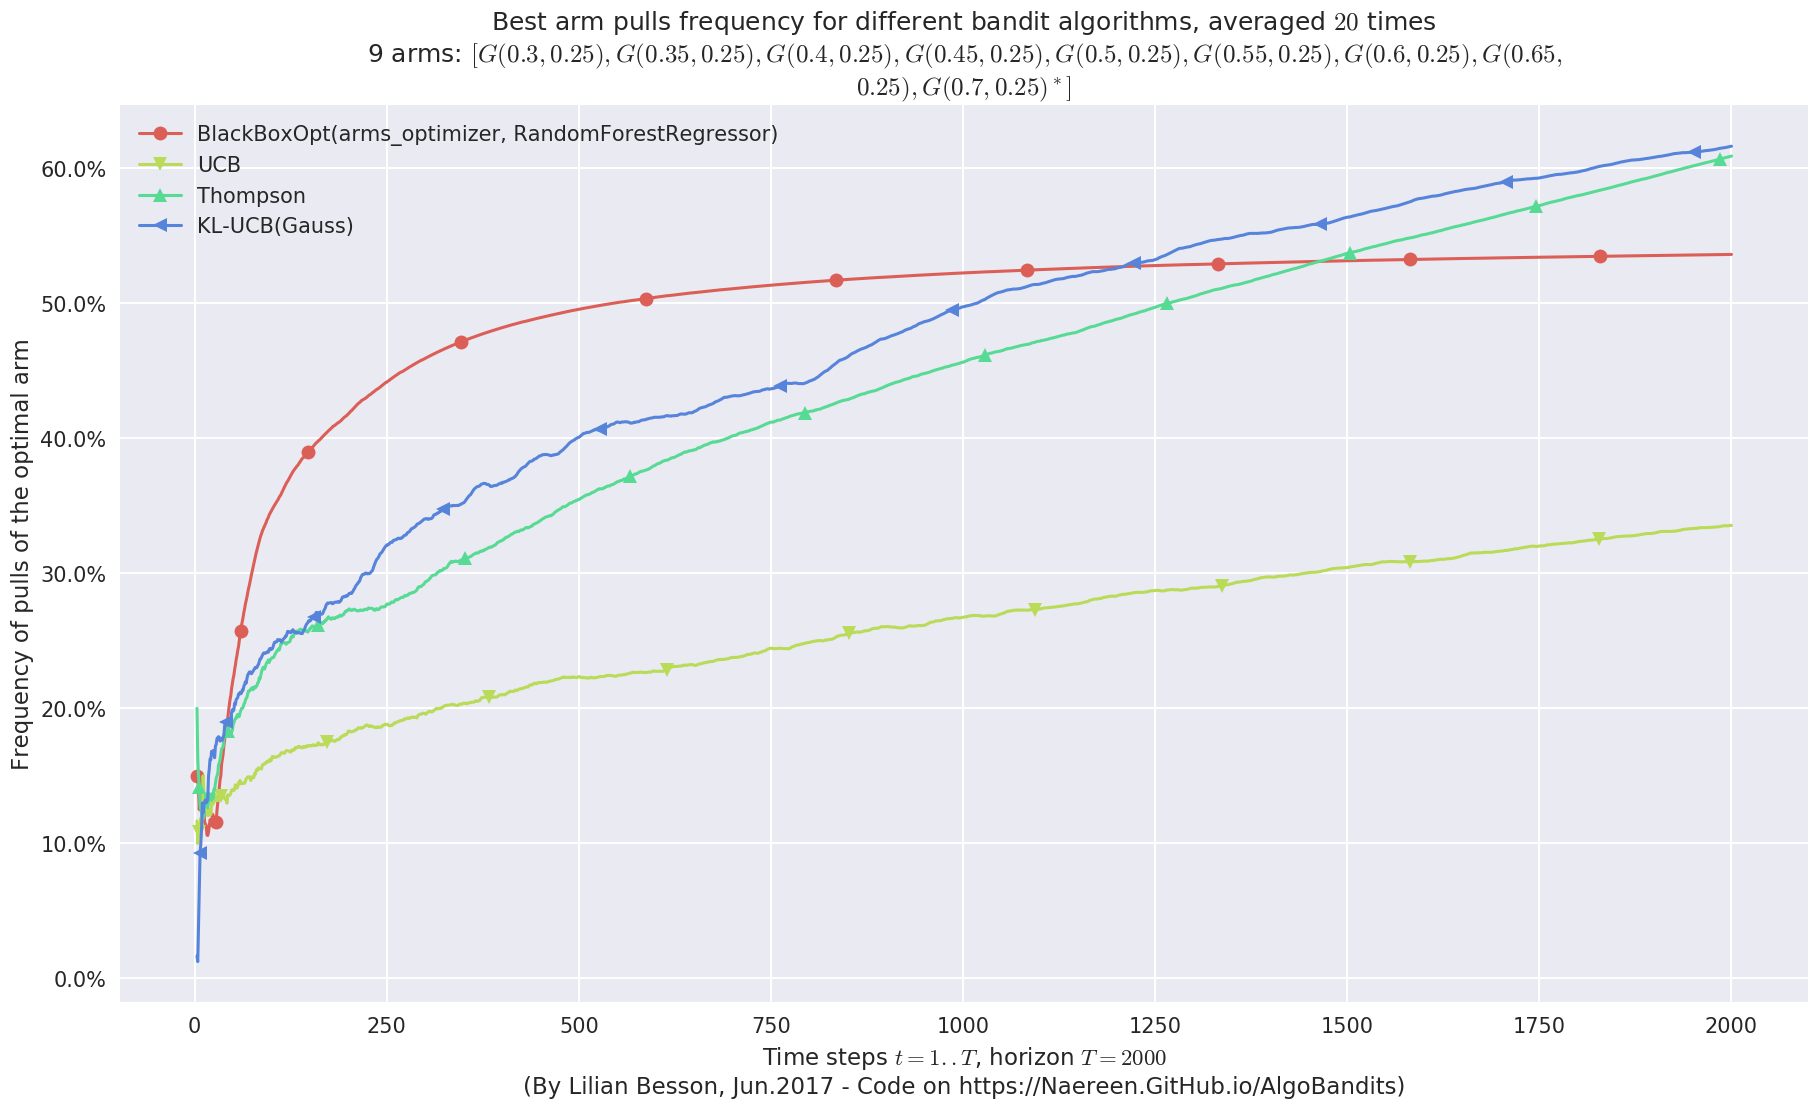

In [35]:
plotAll(evaluation2)

### Very good performance!
Whoo, on this last experiment, the `BlackBoxOpt` policy works way better than the three other policies !!

----
## Another experiment, with Bernoulli arms

Let also try the same algorithms but on Bernoulli arms.

In [36]:
from Arms import Bernoulli

In [37]:
HORIZON = 2000
REPETITIONS = 20
N_JOBS = min(REPETITIONS, 4)
means = [0.30, 0.35, 0.40, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70]
ENVIRONMENTS = [ [Bernoulli(mu) for mu in means] ]

In [42]:
klucbBern = klucb_mapping['Bernoulli']

POLICIES = [
        # --- Our algorithm, with two Unsupervised Learning algorithms
        {
            "archtype": BlackBoxOpt,
            "params": {}
        },
        # --- Basic UCB1 algorithm
        {
            "archtype": UCB,
            "params": {}
        },
        # --- Thompson sampling algorithm
        {
            "archtype": Thompson,
            "params": {}
        },
        # --- klUCB algorithm, with Bernoulli klucb function
        # https://smpybandits.github.io/docs/Arms.kullback.html#Arms.kullback.klucbBern
        {
            "archtype": klUCB,
            "params": {
                "klucb": klucbBern
            }
        },
    ]

In [43]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}

In [44]:
evaluation3 = Evaluator(configuration)

Number of policies in this comparison: 4
Time horizon: 2000
Number of repetitions: 20
Sampling rate for saving, delta_t_save: 1
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 4
Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.3), B(0.35), B(0.4), B(0.45), B(0.5), B(0.55), B(0.6), B(0.65), B(0.7)] ...
 - with 'arms' = [B(0.3), B(0.35), B(0.4), B(0.45), B(0.5), B(0.55), B(0.6), B(0.65), B(0.7)]
 - with 'means' = [ 0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7 ]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.7
 - with 'minArm' = 0.3

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 24.3 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...
 - with 'arms' represented as: $[B(0.3), B(0.35), B(0.4), B(0.45), B(0.5), B(0.55), B(0.6), B(0.65), B(0.7)^*]$
Number of environments to try: 1


### Running the experiment

We asked to repeat the experiment $20$ times, so it will take a while...

In [45]:
%%time
for envId, env in tqdm(enumerate(evaluation3.envs), desc="Problems"):
    # Evaluate just that env
    evaluation3.startOneEnv(envId, env)


Evaluating environment: MAB(nbArms: 9, arms: [B(0.3), B(0.35), B(0.4), B(0.45), B(0.5), B(0.55), B(0.6), B(0.65), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding policy #1 = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class '__main__.BlackBoxOpt'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'Policies.UCB.UCB'>, 'params': {}} ...
- Adding policy #3 = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'Policies.Thompson.Thompson'>, 'params': {}} ...
- Adding policy #4 = {'archtype': <class 'Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][3]' = {'a

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 15.2min
[Parallel(n_jobs=4)]: Done  17 out of  20 | elapsed: 35.6min remaining:  6.3min



- Evaluating policy #2/4: UCB ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 36.0min finished



Estimated order by the policy UCB after 2000 steps: [0 4 3 2 1 6 5 8 7] ...
  ==> Optimal arm identification: 92.86% (relative success)...
  ==> Manhattan   distance from optimal ordering: 70.37% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 96.29% (relative success)...
  ==> Spearman    distance from optimal ordering: 99.04% (relative success)...
  ==> Gestalt     distance from optimal ordering: 44.44% (relative success)...
  ==> Mean distance from optimal ordering: 77.54% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s



- Evaluating policy #3/4: Thompson ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s finished



Estimated order by the policy Thompson after 2000 steps: [0 3 1 4 6 5 2 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 75.31% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 98.77% (relative success)...
  ==> Spearman    distance from optimal ordering: 98.75% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 84.87% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.3s



- Evaluating policy #4/4: KL-UCB(Bern) ...


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.9s finished



Estimated order by the policy KL-UCB(Bern) after 2000 steps: [0 2 1 4 3 5 6 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 90.12% (relative success)...
  ==> Kendell Tau distance from optimal ordering: 99.92% (relative success)...
  ==> Spearman    distance from optimal ordering: 100.00% (relative success)...
  ==> Gestalt     distance from optimal ordering: 77.78% (relative success)...
  ==> Mean distance from optimal ordering: 91.95% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.5s



CPU times: user 1.5 s, sys: 560 ms, total: 2.06 s
Wall time: 36min 5s


[Parallel(n_jobs=4)]: Done  17 out of  20 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    1.7s finished


### Visualizing the results
Now, we can plot some performance measures, like the regret, the best arm selection rate, the average reward etc.


Final ranking for this environment #0 :
- Policy 'BlackBoxOpt(arms_optimizer, RandomForestRegressor)'	was ranked	1 / 4 for this simulation (last regret = 46.7).
- Policy 'Thompson'	was ranked	2 / 4 for this simulation (last regret = 65.35).
- Policy 'KL-UCB(Bern)'	was ranked	3 / 4 for this simulation (last regret = 85.6).
- Policy 'UCB'	was ranked	4 / 4 for this simulation (last regret = 190.35).

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 24.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


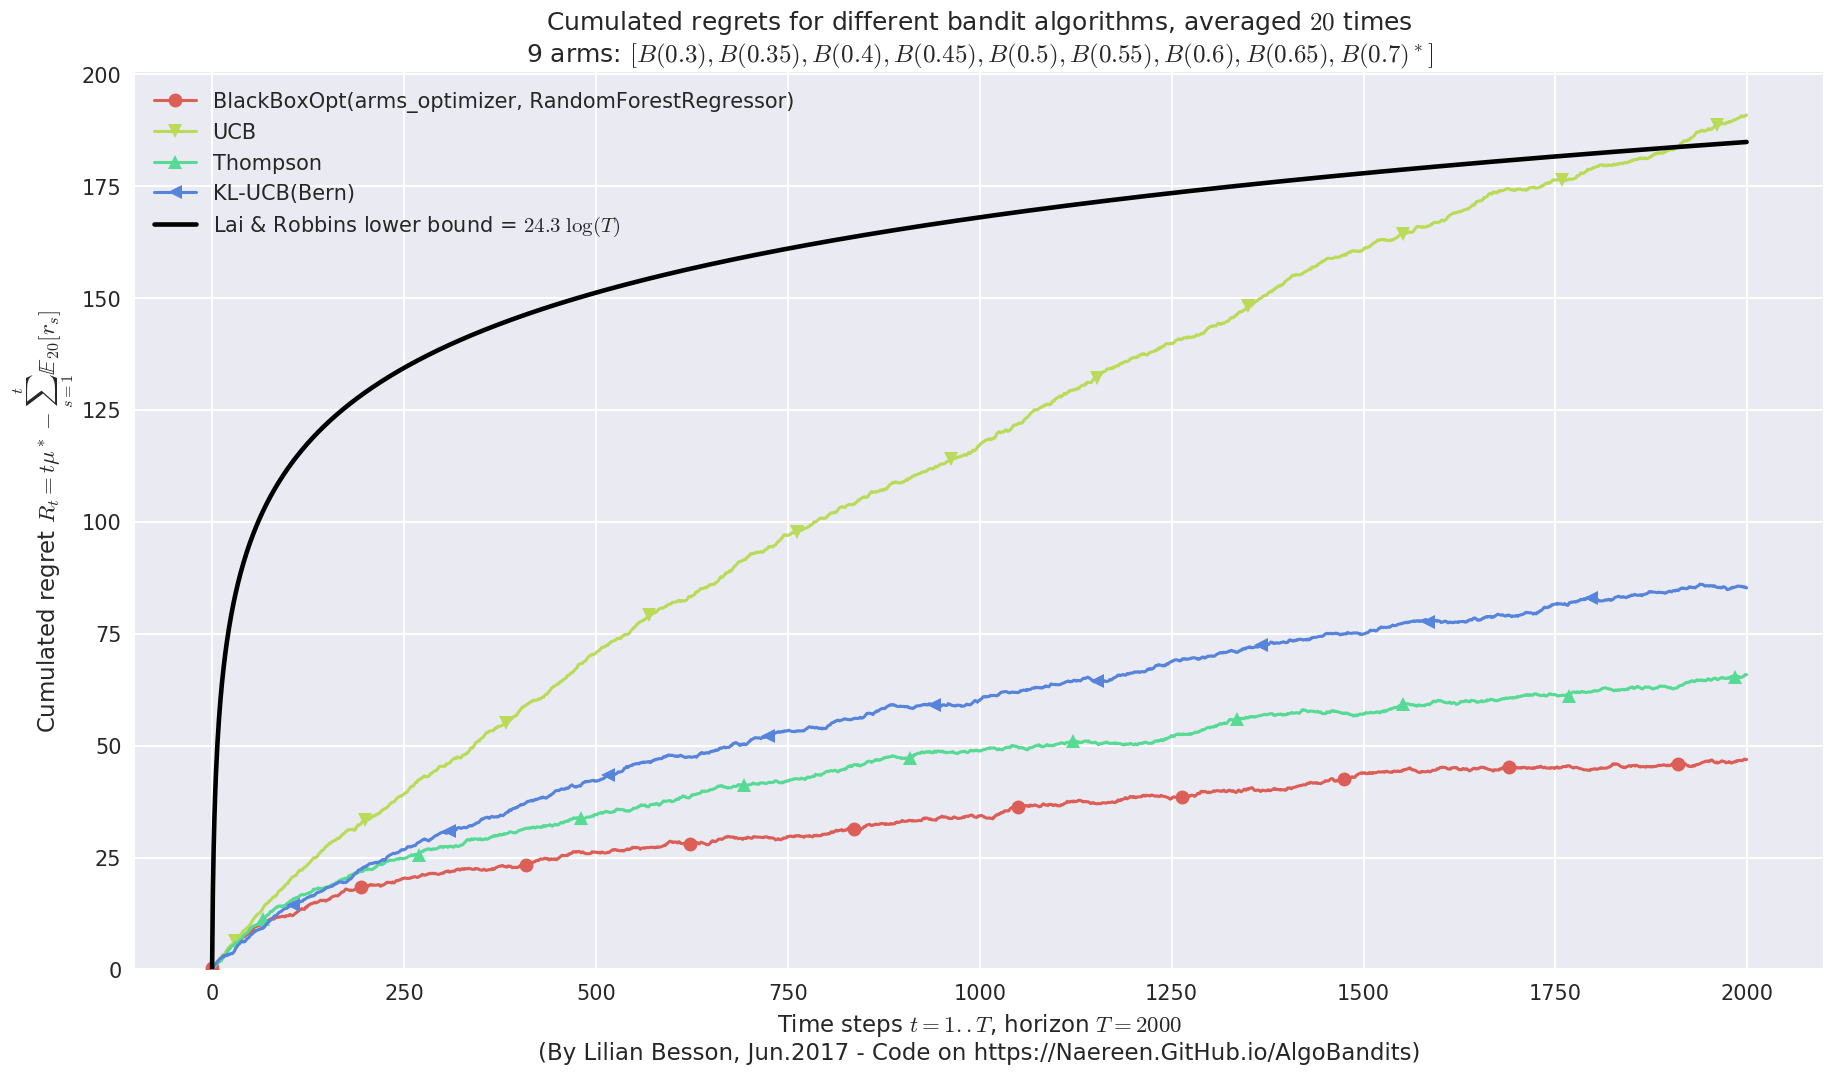


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 24.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


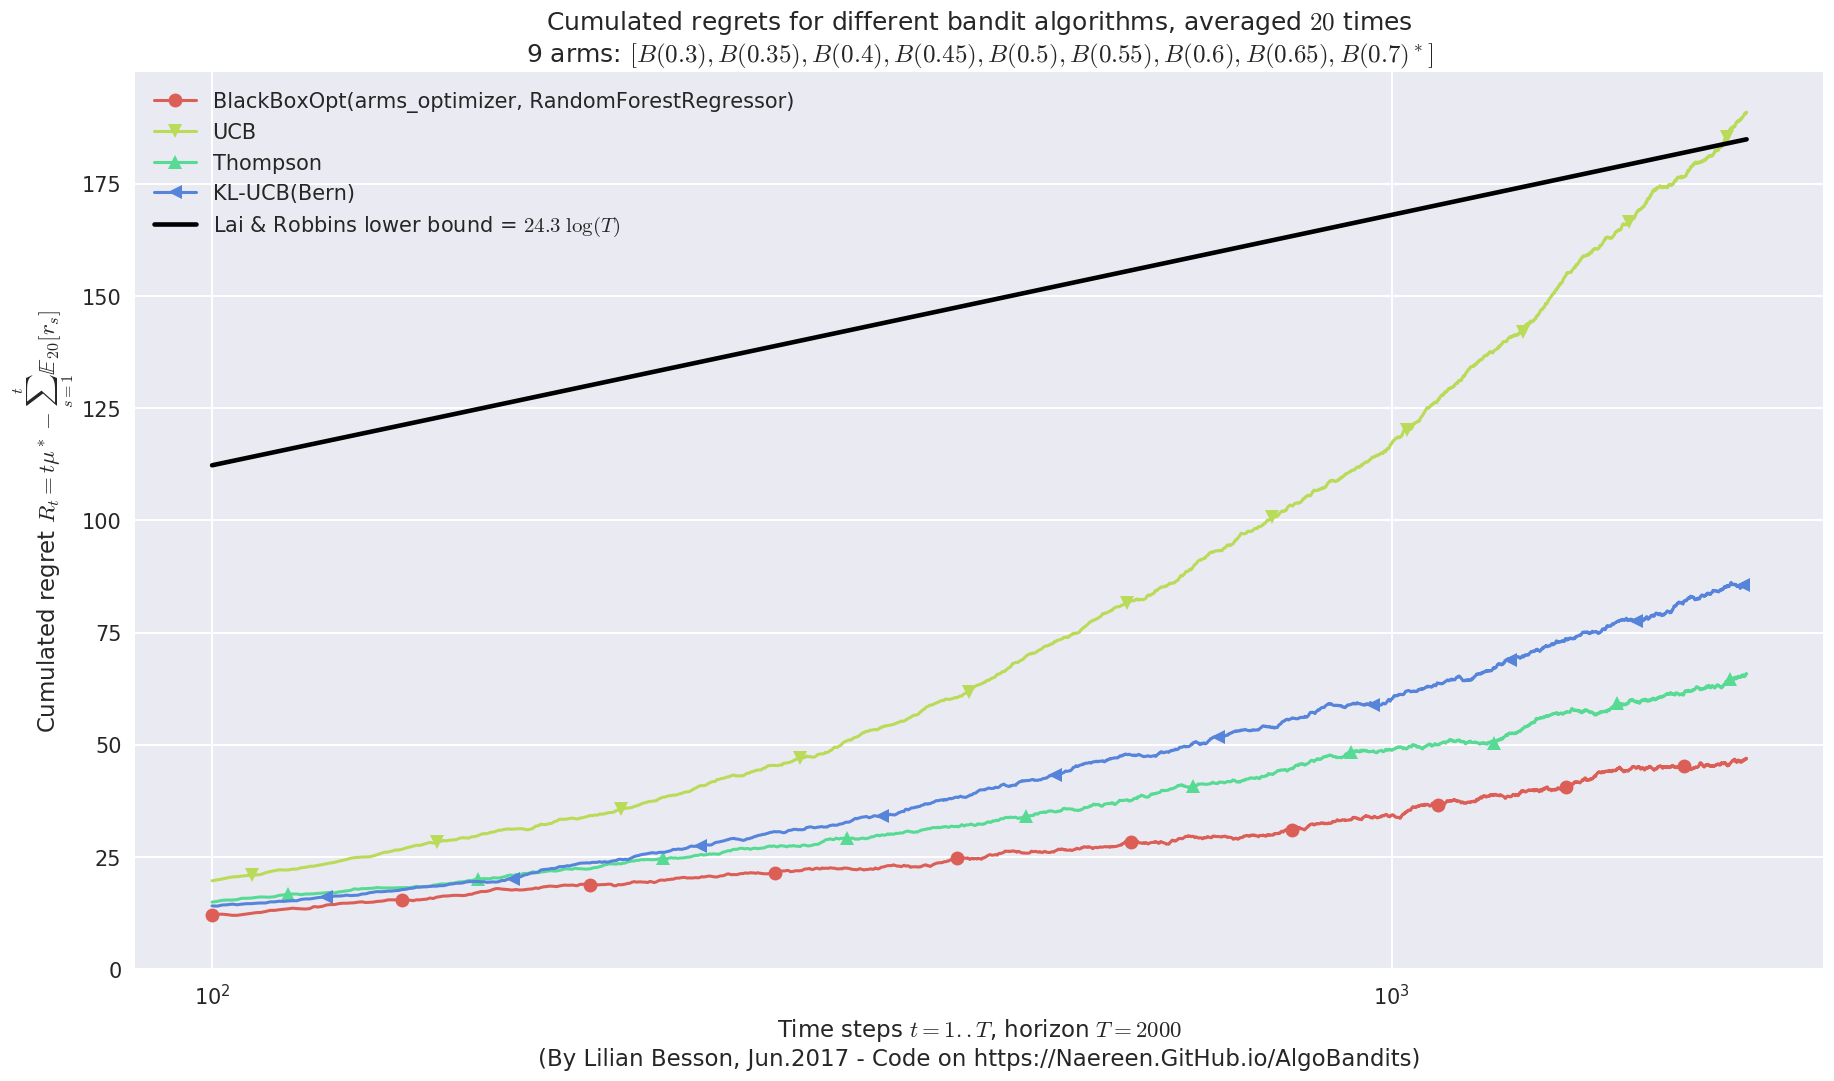


This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 24.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 68.89% ...


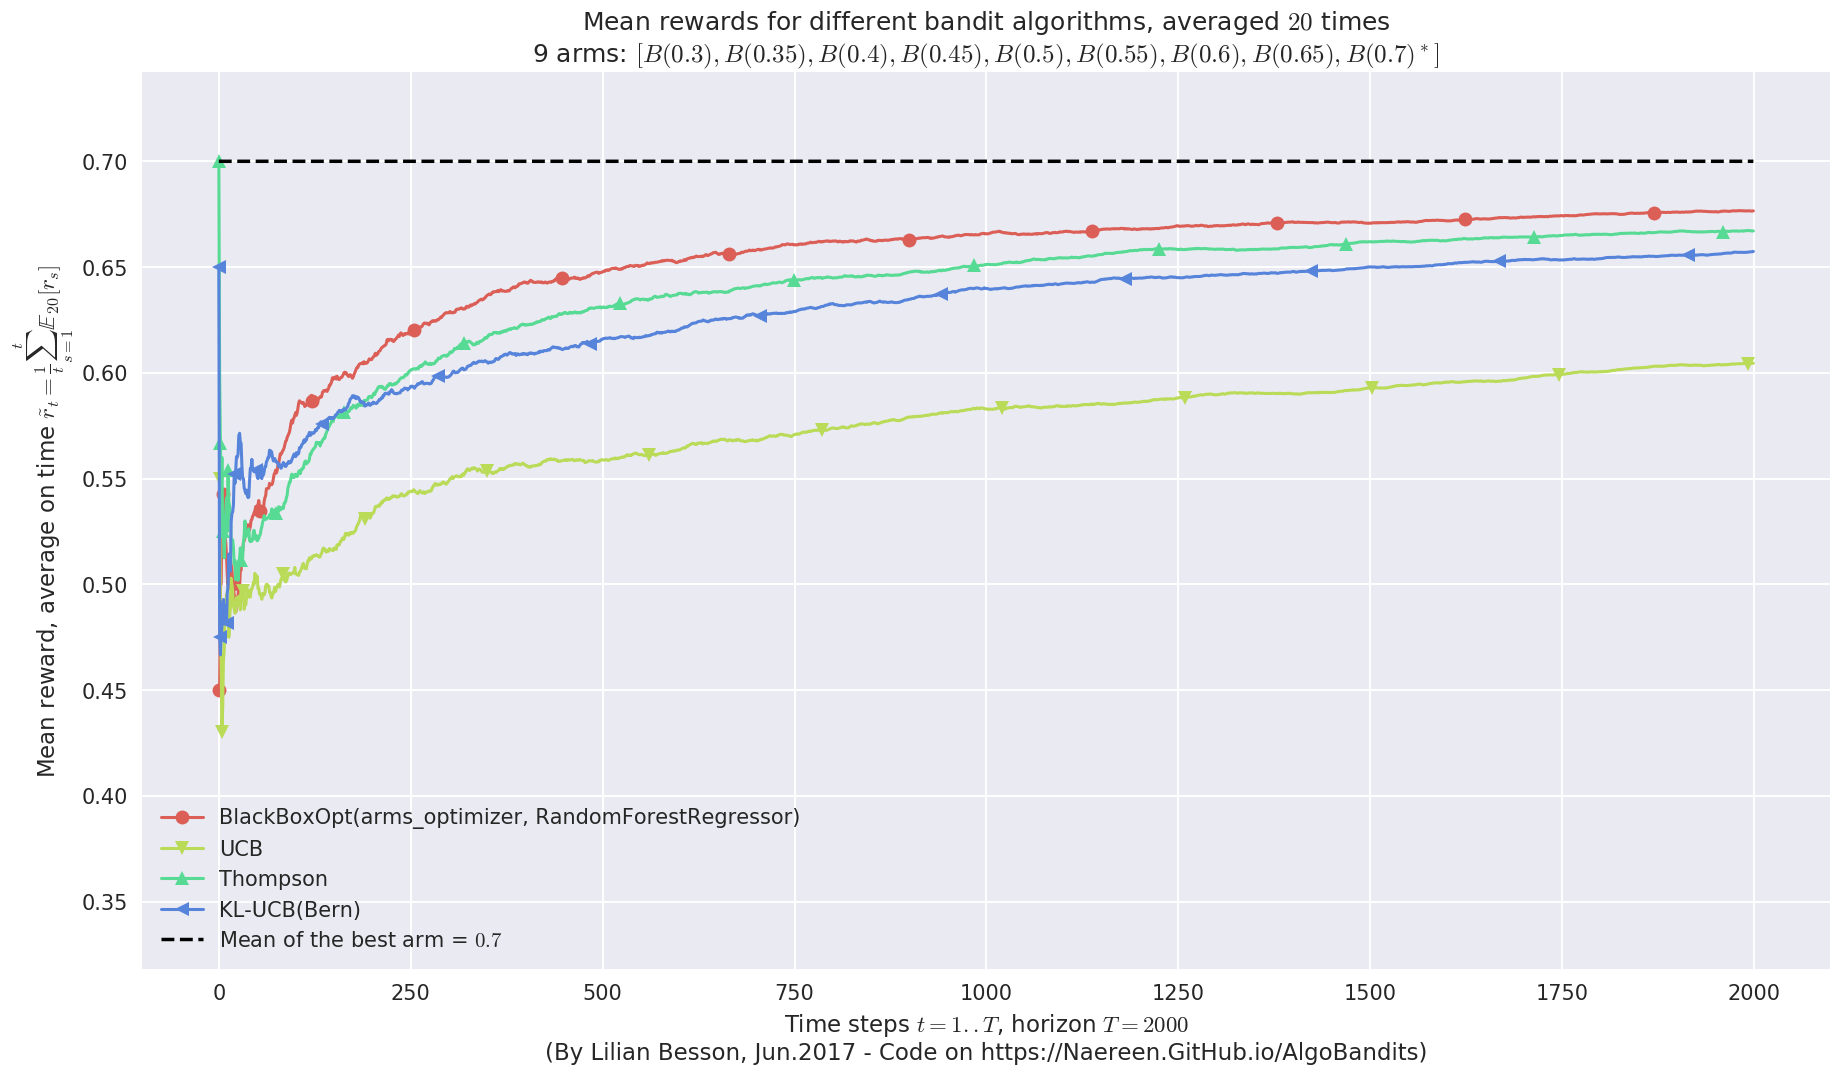

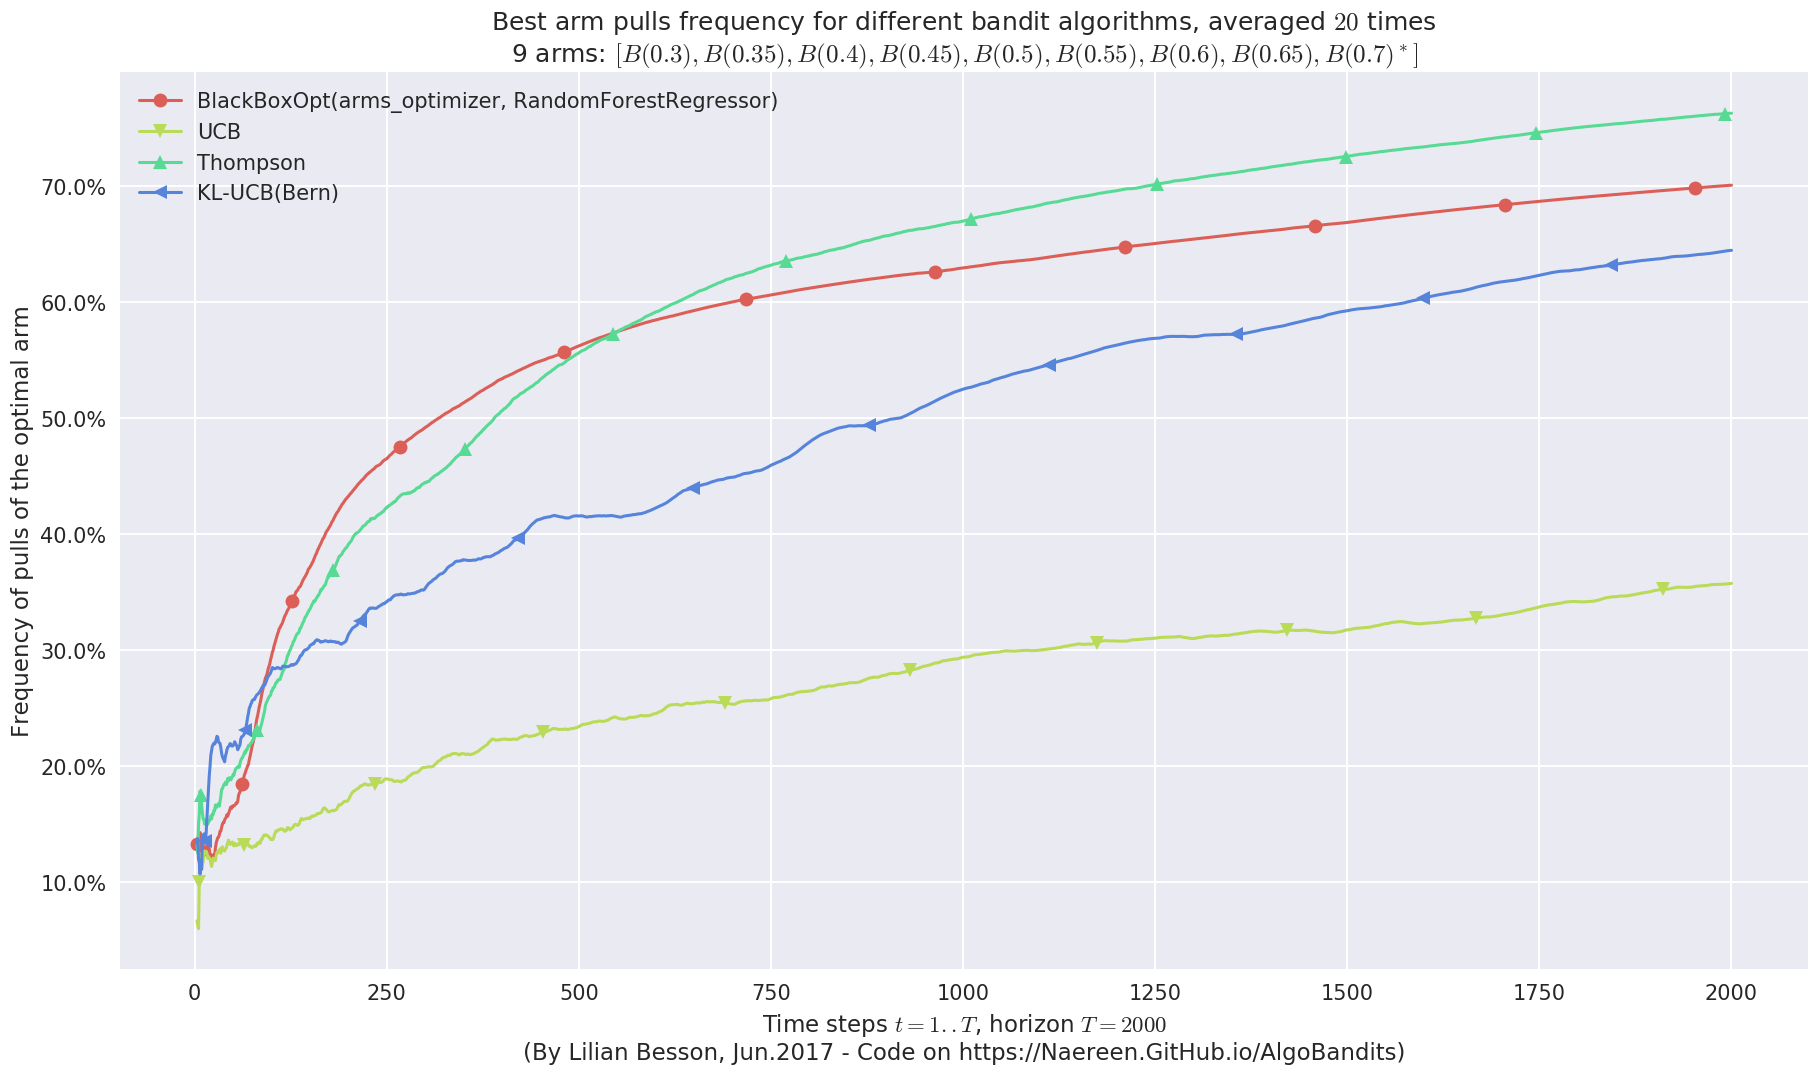

In [46]:
plotAll(evaluation3)

### Very good performances also!

We can see that `BlackBoxOpt` with `RandomForestRegressor` also has very good performances on Bernoulli problems!

----
## Conclusion

This small simulation shows that with the appropriate tweaking of parameters, and on reasonably easy Gaussian Multi-Armed Bandit problems, one can use a **Black-Box Bayesian** optimization algorithm, with an "ask-and-tell" API to make it *on-line*.

Without the need of any parameter tweaking or model selection steps, the `BlackBoxOpt` policy was quite efficient (using the default [`Optimizer`](https://scikit-optimize.github.io/learning/index.html#skopt.Optimizer) and the [`RandomForestRegressor`](https://scikit-optimize.github.io/index.html#skopt.learning.RandomForestRegressor), from [`skopt`](https://scikit-optimize.github.io/) package).

When comparing in terms of mean rewards, accumulated rewards, best-arm selection, and regret (loss against the best fixed-arm policy), this `BlackBoxOpt` algorithm performs as well as the others.

### Non-logarithmic regret ?
But in terms of regret, it seems that the profile for `BlackBoxOpt` is **not** *asymptotically logarithmic*, contrarily to `Thompson` and `klUCB` (*cf.* see the first curve above, at the end on the right).

- Note that the horizon is not that large, $T = 2000$ is really not that very long.
- And note that we didn't try any other regressor (I tried them elsewhere: [`ExtraTreesRegressor`](https://scikit-optimize.github.io/learning/index.html#skopt.learning.ExtraTreesRegressor) worked similarly but it is slower, and [`GaussianProcessRegressor`](https://scikit-optimize.github.io/learning/index.html#skopt.learning.GaussianProcessRegressor) was failing, don't really know why. I think it is not designed to work with Categorical inputs.

### Comparing *time complexity*
Another aspect is the *time complexity* of the `BlackBoxOpt` policy.
In the simulation above, we saw that it took **way much time** than the online bandit algorithms, like `UCB`, `klUCB` or `Thompson` sampling.

----
This notebook is here to illustrate my [SMPyBandits](https://smpybandits.github.io/) library, for which a complete documentation is available, [here at https://smpybandits.github.io/](https://smpybandits.github.io/).

> See the discussion on [`skopt` GitHub issues #407](https://github.com/scikit-optimize/scikit-optimize/issues/407).

> That's it for this demo! See you, folks!